<a href="https://colab.research.google.com/github/thawnglong/Projects-Portfolio/blob/main/Olist_Data_Analytics_EDA_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get Ready

In [ ]:
from google.colab import drive
drive.mount('Final_Project')

Mounted at Final_Project


In [ ]:
#import relevent library and dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
porter = PorterStemmer()
porter.stem("changing")
stops = stopwords.words("english")
customer = pd.read_csv('/content/Final_Project/MyDrive/Final_Project/olist_customers_dataset.csv')
geolocation = pd.read_csv('/content/Final_Project/MyDrive/Final_Project/olist_geolocation_dataset.csv')
order_item = pd.read_csv('/content/Final_Project/MyDrive/Final_Project/olist_order_items_dataset.csv')
order_payment = pd.read_csv('/content/Final_Project/MyDrive/Final_Project/olist_order_payments_dataset.csv')
order_review = pd.read_csv('/content/Final_Project/MyDrive/Final_Project/olist_order_reviews_dataset.csv')
order = pd.read_csv('/content/Final_Project/MyDrive/Final_Project/olist_orders_dataset.csv')
product = pd.read_csv('/content/Final_Project/MyDrive/Final_Project/olist_products_dataset.csv')
seller = pd.read_csv('/content/Final_Project/MyDrive/Final_Project/olist_sellers_dataset.csv')
product_trans = pd.read_csv('/content/Final_Project/MyDrive/Final_Project/product_category_name_translation.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Clean

In [ ]:
#display all columns
pd.options.display.max_columns = None

## Customer

In [ ]:
#check null and duplicated
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
customer.shape

(99441, 5)

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
customer[customer.duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


## Seller

In [ ]:
#check null and duplicated
seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
seller.shape

(3095, 4)

In [ ]:
seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
seller[seller.duplicated()]

,seller_id,seller_zip_code_prefix,seller_city,seller_state


## Geo

In [ ]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


## Order

In [ ]:
#check null n duplicated
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
order.shape

(99441, 8)

In [ ]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
#string to datetime
order['order_delivered_carrier_date']=pd.to_datetime(order['order_delivered_carrier_date'])

In [ ]:
order['order_delivered_customer_date']=pd.to_datetime(order['order_delivered_customer_date'])
order['order_estimated_delivery_date']=pd.to_datetime(order['order_estimated_delivery_date'])
order['order_purchase_timestamp']=pd.to_datetime(order['order_purchase_timestamp'])
order['order_approved_at']=pd.to_datetime(order['order_approved_at'])
order_review['review_creation_date']=pd.to_datetime(order_review['review_creation_date'])
order_review['review_answer_timestamp']=pd.to_datetime(order_review['review_answer_timestamp'])

In [ ]:
order_review['review_comment_message'] = order_review['review_comment_message'].fillna('None')
order_review['review_comment_title'] = order_review['review_comment_title'].fillna('None')

## Order item

In [ ]:
#check null n duplicated
order_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
# to datetime
order_item['shipping_limit_date']=pd.to_datetime(order_item['shipping_limit_date'])

## Order payment

In [ ]:
order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


## Product

In [ ]:
# translate category name to english
new_product=product.merge(product_trans,on='product_category_name',how='outer')

In [ ]:
new_product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


In [ ]:
#drop non-use columns
new_product.drop(columns=['product_name_lenght','product_description_lenght','product_photos_qty'],inplace=True)


In [ ]:
#just need 1 category name columns in english so drop the other one
new_product['product_category_name']=new_product['product_category_name_english']

In [ ]:
new_product.drop(columns=['product_category_name_english'],inplace=True)

In [ ]:
#check
new_product.columns

Index(['product_id', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [ ]:
new_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32328 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.8+ MB


# EDA

![](https://i.imgur.com/HRhd2Y0.png)

## Sale

In [ ]:
#merge to 1 table to find insights

merged1= pd.merge(customer, order, on="customer_id")
merged1= merged1.merge(order_review, on="order_id")
merged1= merged1.merge(order_item, on="order_id")
merged1= merged1.merge(new_product, on="product_id")
#merge= merged1.merge(payments_df, on="order_id")
merged1= merged1.merge(seller, on='seller_id')


In [ ]:
merged2= pd.merge(customer, order, on="customer_id")
merged2= merged2.merge(order_review, on="order_id")
#merged2= merged2.merge(order_item, on="order_id")
#merged2= merged2.merge(product, on="product_id")
merge2= merged2.merge(order_payment, on="order_id")
#merged2= merged2.merge(seller, on='seller_id')

In [ ]:
merged1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,88b8b52d46df026a9d1ad2136a59b30b,4,None,None,2017-05-26,2017-05-30 22:34:40,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,office_furniture,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,7fc63200f12eebb5f387856afdd63db8,1,None,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29,2017-12-01 19:41:59,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,office_furniture,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,7fc63200f12eebb5f387856afdd63db8,1,None,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29,2017-12-01 19:41:59,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,office_furniture,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12,251191809e37c1cffc16865947c18a4d,3,None,"Produto compatível com seu valor, muito bonito...",2017-05-27,2017-05-28 02:43:16,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,office_furniture,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22,f7123bac5b91a0e2e38d8b41fd1206f4,4,None,Entregou antes do prazo,2018-03-01,2018-03-02 11:11:24,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,office_furniture,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP


In [ ]:
# discard all cancelled orders
merged1=merged1[merged1['order_status'].isin(['delivered', 'shipped', 'invoiced', 'processing','approved'])]

In [ ]:
# category revenue
category = merged1.groupby('product_category_name')[['price','freight_value']].sum().reset_index()


In [ ]:
#frieght value / product price
category['f/p_ratio']=category['freight_value']/category['price']

In [ ]:
category.sort_values('price',ascending=False)

,product_category_name,price,freight_value,f/p_ratio
43,health_beauty,1249418.64,181500.85,0.145268
70,watches_gifts,1191004.01,99426.64,0.083481
7,bed_bath_table,1039115.69,204538.72,0.196839
65,sports_leisure,978710.87,167361.00,0.171001
15,computers_accessories,907164.99,146959.49,0.161999
...,...,...,...,...
35,flowers,1000.24,453.55,0.453441
11,cds_dvds_musicals,730.00,224.99,0.308205
46,home_comfort_2,721.57,365.01,0.505855
29,fashion_childrens_clothes,569.85,95.51,0.167606


watches_gifts's f/p 50% lower than other categories in top 5 revenue



In [ ]:
# number of product sold
merged1.groupby('product_category_name')['product_id'].count().reset_index().sort_values('product_id',ascending=False)

,product_category_name,product_id
7,bed_bath_table,11119
43,health_beauty,9609
65,sports_leisure,8590
39,furniture_decor,8295
15,computers_accessories,7805
...,...,...
3,arts_and_craftmanship,24
11,cds_dvds_musicals,14
52,la_cuisine,13
29,fashion_childrens_clothes,8


In [ ]:

category= pd.merge(category, merged1.groupby('product_category_name')['product_id'].count().reset_index().sort_values('product_id',ascending=False), on="product_category_name")

In [ ]:
category = category.sort_values('product_id',ascending=False)

In [ ]:
#avg price per product
category['p/p'] = category['price']/category['product_id']
category.sort_values('p/p',ascending=False)

,product_category_name,price,freight_value,f/p_ratio,product_id,p/p
14,computers,214198.13,9526.16,0.044474,200,1070.990650
64,small_appliances_home_oven_and_coffee,47445.71,2747.86,0.057916,76,624.285658
45,home_appliances_2,110707.49,10422.59,0.094145,236,469.099534
0,agro_industry_and_commerce,72530.47,5843.60,0.080568,212,342.124858
63,small_appliances,187354.86,15876.00,0.084738,670,279.634119
...,...,...,...,...,...,...
37,food_drink,15210.47,4536.96,0.298279,278,54.713921
11,cds_dvds_musicals,730.00,224.99,0.308205,14,52.142857
23,diapers_and_hygiene,1538.79,562.46,0.365521,38,40.494474
35,flowers,1000.24,453.55,0.453441,31,32.265806


In [ ]:
category['freight/product']=category['freight_value']/category['product_id']

# Insight

## 1. Category performance

In [ ]:
#dataset overview
#total orders count
order['order_id'].count()

99441

In [ ]:
#total sellers count
seller['seller_id'].count()

3095

In [ ]:
# top 5 seller revenue categories
top5=category.sort_values('price',ascending=False).head(5)
top5

,product_category_name,price,freight_value,f/p_ratio,product_id,p/p,freight/product
43,health_beauty,1249418.64,181500.85,0.145268,9609,130.025876,18.888630
70,watches_gifts,1191004.01,99426.64,0.083481,5930,200.843847,16.766718
7,bed_bath_table,1039115.69,204538.72,0.196839,11119,93.454060,18.395424
65,sports_leisure,978710.87,167361.00,0.171001,8590,113.936073,19.483236
15,computers_accessories,907164.99,146959.49,0.161999,7805,116.228698,18.828890


In [ ]:
#total seller revenue
category['price'].sum()

13248579.47

In [ ]:
#number of categories
category.shape[0]

71

In [ ]:
5/71


0.07042253521126761

In [ ]:
top5['price'].sum()/category['price'].sum()

0.4049803386204091

5 categories cover 40.5% total seller revenue

In [ ]:
top5[top5['product_category_name']=='watches_gifts']['price']/category['price'].sum()

70    0.089897
Name: price, dtype: float64

watches_gifts top2, cover ~9% seller revenue

In [ ]:
top5['product_category_name'].values

array(['health_beauty', 'watches_gifts', 'bed_bath_table',
       'sports_leisure', 'computers_accessories'], dtype=object)

## 2. Shipping

### Shipping fee

In [ ]:
merged1

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,88b8b52d46df026a9d1ad2136a59b30b,4,None,None,2017-05-26,2017-05-30 22:34:40,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,office_furniture,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,7fc63200f12eebb5f387856afdd63db8,1,None,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29,2017-12-01 19:41:59,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,office_furniture,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,7fc63200f12eebb5f387856afdd63db8,1,None,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29,2017-12-01 19:41:59,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,office_furniture,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12,251191809e37c1cffc16865947c18a4d,3,None,"Produto compatível com seu valor, muito bonito...",2017-05-27,2017-05-28 02:43:16,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,office_furniture,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22,f7123bac5b91a0e2e38d8b41fd1206f4,4,None,Entregou antes do prazo,2018-03-01,2018-03-02 11:11:24,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,office_furniture,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112366,59168d27c5da6a50e3d1f03d482e80b2,393c2ace23a135d0bcc7e70167448e16,47800,barreiras,BA,c382d84d35f4d874b1f1c372f4bde27c,delivered,2018-07-20 09:42:40,2018-07-20 15:05:22,2018-07-23 11:53:00,2018-07-27 11:54:15,2018-08-14,ad5b887e12660a77a4e7f0b5130f36f3,5,Perfeito,"Ótimo produto, entrega rápida, superou minhas ...",2018-07-28,2018-07-30 16:48:30,1,731cf6fbf44cc64a9583fabe2c00750e,398cb257329ef7af7f1943a8974a3cbc,2018-08-01 15:05:22,145.90,15.47,drinks,2250.0,16.0,28.0,16.0,40285,salvador,BA
112368,eda10d7eb51a675d000956fa1aabc7dd,5c22dbb9d8b5385953f2f1e6d9d115a7,39920,jordania,MG,b494f624c631105b24fe497277085909,delivered,2018-08-01 18:58:49,2018-08-02 18:50:15,2018-08-03 15:39:00,2018-08-13 23:16:46,2018-08-27,709ee020ff826ee5289d7dd5d6911d0c,5,None,None,2018-08-14,2018-08-15 11:31:29,1,a2fce4213a6ac271129618259a334261,914

In [ ]:
import datetime

In [ ]:
#define late delivery
late=[]
for x in merged1.index:
  if merged1['order_delivered_customer_date'][x]>(merged1['order_estimated_delivery_date'][x]+datetime.timedelta(days=1)):
    late.append('Late')
  else:
    late.append('Ontime')

In [ ]:
merged1['delivery_status']=pd.Series(late,index=merged1.index)

In [ ]:
#lowscore and high score
score=[]
for x in merged1.index:
  if merged1['review_score'][x]< 3:
    score.append('Low score')
  elif merged1['review_score'][x]> 3:
    score.append('High score')
  else:
    score.append('Average')

In [ ]:
merged1['Score_group']=pd.Series(score,index=merged1.index)

In [ ]:
# define freeship or not
ship=[]
for x in merged1.index:
  if merged1['freight_value'][x]>0:
    ship.append('None')
  else:
    ship.append('Freeship')

In [ ]:
ship

['None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 

In [ ]:
merged1['fee_status']=pd.Series(ship,index=merged1.index)

In [ ]:
# sorted out top 5 category
top = merged1[merged1['product_category_name'].isin(['health_beauty', 'watches_gifts', 'bed_bath_table',
       'sports_leisure', 'computers_accessories'])]

In [ ]:
#length width height to kg
top['converted_weight_g']=top['product_length_cm']*top['product_height_cm']*top['product_width_cm']/6

<ipython-input-61-3b8a285bf5ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top['converted_weight_g']=top['product_length_cm']*top['product_height_cm']*top['product_width_cm']/6


In [ ]:
top

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,delivery_status,Score_group,fee_status,converted_weight_g
969,17f9863585a471e9ffe77c4d4f26ecea,d4336c36fbe83d4668606c4361932e1d,11750,peruibe,SP,83f0c4c6b1a3c31214ca8266dc888258,delivered,2018-01-27 00:10:10,2018-01-27 00:18:24,2018-02-09 13:09:34,2018-02-21 23:33:12,2018-03-09,84dbddcea45a1134640eec4e9c849d96,1,None,Das cinco cadeiras que comprei chegaram soment...,2018-02-22,2018-02-23 05:07:39,1,61a53738adc5c0e8d243553320f9ba1c,7c67e1448b00f6e969d365cea6b010ab,2018-02-09 00:18:24,79.97,10.86,sports_leisure,8809.0,52.0,52.0,17.0,8577,itaquaquecetuba,SP,Ontime,Low score,None,7661.333333
970,17f9863585a471e9ffe77c4d4f26ecea,d4336c36fbe83d4668606c4361932e1d,11750,peruibe,SP,83f0c4c6b1a3c31214ca8266dc888258,delivered,2018-01-27 00:10:10,2018-01-27 00:18:24,2018-02-09 13:09:34,2018-02-21 23:33:12,2018-03-09,84dbddcea45a1134640eec4e9c849d96,1,None,Das cinco cadeiras que comprei chegaram soment...,2018-02-22,2018-02-23 05:07:39,3,61a53738adc5c0e8d243553320f9ba1c,7c67e1448b00f6e969d365cea6b010ab,2018-02-09 00:18:24,79.97,10.86,sports_leisure,8809.0,52.0,52.0,17.0,8577,itaquaquecetuba,SP,Ontime,Low score,None,7661.333333
971,17f9863585a471e9ffe77c4d4f26ecea,d4336c36fbe83d4668606c4361932e1d,11750,peruibe,SP,83f0c4c6b1a3c31214ca8266dc888258,delivered,2018-01-27 00:10:10,2018-01-27 00:18:24,2018-02-09 13:09:34,2018-02-21 23:33:12,2018-03-09,84dbddcea45a1134640eec4e9c849d96,1,None,Das cinco cadeiras que comprei chegaram soment...,2018-02-22,2018-02-23 05:07:39,5,61a53738adc5c0e8d243553320f9ba1c,7c67e1448b00f6e969d365cea6b010ab,2018-02-09 00:18:24,79.97,10.86,sports_leisure,8809.0,52.0,52.0,17.0,8577,itaquaquecetuba,SP,Ontime,Low score,None,7661.333333
972,ff03c28afb14c93650bf591cb49fe327,f943b83abc6dc853db41b32672451845,14980,sales,SP,923cf1bc71993b447259c9e8bf54eb07,delivered,2018-03-01 14:20:46,2018-03-01 15:15:43,2018-03-12 16:38:51,2018-03-20 20:02:42,2018-04-04,ecce64ee98e7b5e54b123a9448b4e922,5,None,None,2018-03-21,2018-03-22 14:54:59,1,61a53738adc5c0e8d243553320f9ba1c,7c67e1448b00f6e969d365cea6b010ab,2018-03-15 15:15:43,89.97,24.94,sports_leisure,8809.0,52.0,52.0,17.0,8577,itaquaquecetuba,SP,Ontime,High score,None,7661.333333
973,093e5958897592f409553d0344ce50c2,97f97fe763e10c170a7bfb484d787f89,12243,sao jose dos campos,SP,0764f8b9a45b0305b75e1bbd614ffaaa,delivered,2017-09-16 21:00:06,2017-09-16 21:10:10,2017-09-27 22:24:30,2017-10-01 11:52:06,2017-10-06,94c0e9eae0f6b2c3c12026ac9bd85c70,1,None,comprei a cadeira em corino e veio em tecido!,2017-10-02,2017-10-03 16:27:31,1,61a53738adc5c0e8d243553320f9ba1c,7c67e1448b00f6e969d365cea6b010ab,2017-09-27 21:10:10,89.97,21.28,sports_leisure,8809.0,52.0,52.0,17.0,8577,itaquaquecetuba,SP,Ontime,Low score,None,7661.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112359,193422684d7e12df2ca405f88df5d891,da6c3ad897704760efba1dafc9f7ff8b,13424,piracicaba,SP,0e19122f9fa8f2ac31d7ee9742b7d98b,delivered,2017-06-26 16:04:07,2017-06-26 16:15:21,2017-06-29 10:03:14,2017-07-03 12:33:38,2017-07-14,2baffcfdc72ed76a22721dc90ed13f07,5,None,None,2017-07-04,2017-07-05 17:30:02,1,7f601afbca26d221fc2d957b6e211e72,fd312b6bf05efac6c3772d5b52205d8a,2017-06-30 16:15:21,29.90,11.85,health_beauty,600.0,20.0,30.0,20.0,18111,votorantim,SP,Ontime,High score,None,2000.000000
112360,193422684d7e12df2ca405f88df5d891,da6c3ad897704760efba1dafc9f7ff8b,13424,piracica

In [ ]:
top.index

Int64Index([   969,    970,    971,    972,    973,    974,    975,    976,
               977,   1071,
            ...
            112352, 112353, 112354, 112356, 112358, 112359, 112360, 112361,
            112362, 112365],
           dtype='int64', length=43053)

In [ ]:
#compare real weight vs converted weight
prolist=[]
for x in top.index:
  if top['product_weight_g'][x] < top['converted_weight_g'][x]:
    prolist.append(top['converted_weight_g'][x])
  else:
    prolist.append(top['product_weight_g'][x])

In [ ]:
final_weight = pd.Series(prolist,index=top.index)

In [ ]:
top['final_weight']=final_weight

<ipython-input-66-aff816f6c6f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top['final_weight']=final_weight


In [ ]:
# freeship item
free = top[top['freight_value']==0].groupby('product_category_name')['product_id'].count()

In [ ]:
freeship = top[(top['freight_value']==0)&(top['product_category_name']=='watches_gifts')]

In [ ]:
#2 products were applied freeship
freeship['product_id'].unique()

array(['53b36df67ebb7c41585e8d54d6772e08',
       '7a10781637204d8d10485c71a6108a2e'], dtype=object)

In [ ]:
#2 seller applied freeship
freeship['seller_id'].unique()

array(['7d13fca15225358621be4086e1eb0964',
       '4869f7a5dfa277a7dca6462dcf3b52b2'], dtype=object)

In [ ]:
#total revenue on freeship order
freeship['price'].sum()

24751.19

In [ ]:
#total freeship product
freeship['product_id'].count()

213

In [ ]:
freeship.describe()
#avg review score 4.37

,customer_zip_code_prefix,review_score,order_item_id,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,converted_weight_g,final_weight
count,213.000000,213.000000,213.000000,213.000000,213.0,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,34749.150235,4.370892,1.093897,116.202770,0.0,553.323944,16.253521,11.253521,13.253521,14253.990610,407.150235,584.126761
std,26157.697437,1.136237,0.445745,32.824134,0.0,80.704172,0.666977,0.666977,0.666977,346.560648,67.920454,0.333488
min,1319.000000,1.000000,1.000000,99.900000,0.0,342.000000,16.000000,11.000000,13.000000,14050.000000,381.333333,584.000000
25%,15385.000000,4.000000,1.000000,99.900000,0.0,584.000000,16.000000,11.000000,13.000000,14050.000000,381.333333,584.000000
50%,26323.000000,5.000000,1.000000,99.900000,0.0,584.000000,16.000000,11.000000,13.000000,14050.000000,381.333333,584.000000
75%,45700.000000,5.000000,1.000000,110.000000,0.0,584.000000,16.000000,11.000000,13.000000,14840.000000,381.333333,584.000000
max,96810.000000,5.000000,5.000000,219.000000,0.0,584.000000,18.000000,13.000000,15.000000,14840.000000,585.000000,585.000000


### Late shipping

In [ ]:
highscore = top[(top['Score_group']=='High score')&(top['product_category_name']=='watches_gifts')]
lowscore = top[(top['Score_group']=='Low score')&(top['product_category_name']=='watches_gifts')]

Text(0.5, 1.0, '4-5 Review Score')

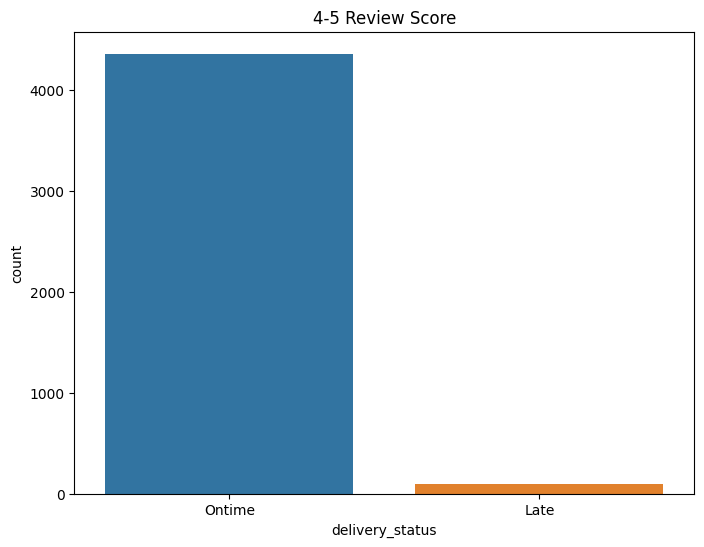

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=highscore, x="delivery_status")
plt.title('4-5 Review Score')

In [ ]:
# 2.11% of high score rating order are late order
highscore[highscore['delivery_status']=='Late']['product_id'].count()/highscore['product_id'].count()

0.021123595505617977

In [ ]:
# 27.5% of low score rating order are late order
lowscore[lowscore['delivery_status']=='Late']['product_id'].count()/lowscore['product_id'].count()

0.27502634351949423

Text(0.5, 1.0, '1-2 Review Score')

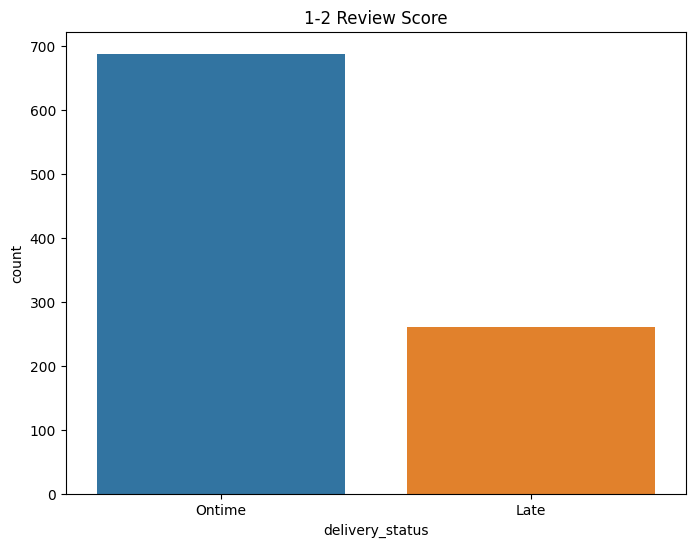

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=lowscore, x="delivery_status")
plt.title('1-2 Review Score')

In [ ]:
#sorted out delivered order to find relevant factor cause of late delivery
delivery = merged1[merged1['order_status']=='delivered'][['order_id','order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date','freight_value',
       'order_estimated_delivery_date','shipping_limit_date','customer_city', 'customer_state','seller_city', 'seller_state','review_score', 'delivery_status', 'Score_group','product_category_name']]

In [ ]:
delivery = delivery[delivery['product_category_name']=='watches_gifts']

In [ ]:
delivery

,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,freight_value,order_estimated_delivery_date,shipping_limit_date,customer_city,customer_state,seller_city,seller_state,review_score,delivery_status,Score_group,product_category_name
4100,7a04a9036cd32390e8f17eaccd2dcef4,2018-02-05 23:26:08,2018-02-06 23:29:58,2018-02-07 17:17:42,2018-02-19 23:17:56,21.15,2018-03-09,2018-02-13 23:29:58,natal,RN,sao paulo,SP,5,Ontime,High score,watches_gifts
4101,5f42573c60286a6f9d6a3809352c86e0,2018-05-26 19:36:13,2018-05-26 19:49:43,2018-05-28 13:45:00,2018-06-01 13:32:45,15.23,2018-07-18,2018-06-04 19:49:43,rio de janeiro,RJ,sao paulo,SP,1,Ontime,Low score,watches_gifts
4102,5f42573c60286a6f9d6a3809352c86e0,2018-05-26 19:36:13,2018-05-26 19:49:43,2018-05-28 13:45:00,2018-06-01 13:32:45,15.23,2018-07-18,2018-06-04 19:49:43,rio de janeiro,RJ,sao paulo,SP,1,Ontime,Low score,watches_gifts
4103,5f42573c60286a6f9d6a3809352c86e0,2018-05-26 19:36:13,2018-05-26 19:49:43,2018-05-28 13:45:00,2018-06-01 13:32:45,15.23,2018-07-18,2018-06-04 19:49:43,rio de janeiro,RJ,sao paulo,SP,1,Ontime,Low score,watches_gifts
4104,44879a8f19c5e8a5e9278477b29a29ea,2018-08-23 20:56:41,2018-08-25 02:35:16,2018-08-27 14:21:00,2018-08-30 20:38:29,18.24,2018-10-04,2018-08-28 02:35:16,mangaratiba,RJ,sao paulo,SP,5,Ontime,High score,watches_gifts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111828,63dbe0c8e63e5f1b4deec09d4f044a7f,2017-11-27 20:01:56,2017-11-27 20:19:11,2017-11-28 20:10:57,2017-12-12 18:43:32,21.69,2017-12-29,2017-12-01 20:19:11,campina grande,PB,feira de santana,BA,4,Ontime,High score,watches_gifts
111829,4fbc8d6f2f4db3e789d5a876fa349b56,2018-02-02 21:38:36,2018-02-03 20:10:18,2018-02-08 01:04:18,2018-07-20 23:37:50,27.24,2018-03-08,2018-02-08 20:10:18,capinzal do norte,MA,feira de santana,BA,5,Late,High score,watches_gifts
112085,61d5f1dcdf9b023ea7622b65d2362e4f,2018-03-30 09:27:22,2018-03-30 10:10:10,2018-04-02 19:59:04,2018-04-11 16:59:55,17.69,2018-04-18,2018-04-05 10:10:10,itariri,SP,guarulhos,SP,1,Ontime,Low score,watches_gifts
112151,ac284fb15053d666dfb6128354f0e662,2018-08-22 14:14:50,2018-08-22 14:25:19,2018-08-22 13:46:00,2018-08-28 21:32:27,24.82,2018-09-14,2018-08-28 14:25:19,sao mateus,ES,sao paulo,SP,5,Ontime,High score,watches_gifts


In [ ]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5825 entries, 4100 to 112249
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       5825 non-null   object        
 1   order_purchase_timestamp       5825 non-null   datetime64[ns]
 2   order_approved_at              5825 non-null   datetime64[ns]
 3   order_delivered_carrier_date   5825 non-null   datetime64[ns]
 4   order_delivered_customer_date  5823 non-null   datetime64[ns]
 5   freight_value                  5825 non-null   float64       
 6   order_estimated_delivery_date  5825 non-null   datetime64[ns]
 7   shipping_limit_date            5825 non-null   datetime64[ns]
 8   customer_city                  5825 non-null   object        
 9   customer_state                 5825 non-null   object        
 10  seller_city                    5825 non-null   object        
 11  seller_state

In [ ]:
# define ontime n late order due to order_delivered_carrier_date vs shipping limit date
deli=[]
for x in delivery.index:
  if delivery['order_delivered_carrier_date'][x] < delivery['shipping_limit_date'][x]:
    deli.append('Ontime')
  else:
    deli.append('Late')

In [ ]:
deli

['Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Late',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 'Ontime',
 

In [ ]:
delivery['to_logistic_status'] = pd.Series(deli,index=delivery.index)

In [ ]:
# calculate delivered time to logistic partner
delivery['to_logistic_day'] = delivery['order_delivered_carrier_date'] - delivery['order_approved_at']

In [ ]:
lg_ontime=delivery[delivery['to_logistic_status']=='Ontime']

In [ ]:
lg_late=delivery[delivery['to_logistic_status']=='Late']

<Axes: title={'center': 'Product to Logistic Ontime'}, xlabel='delivery_status', ylabel='count'>

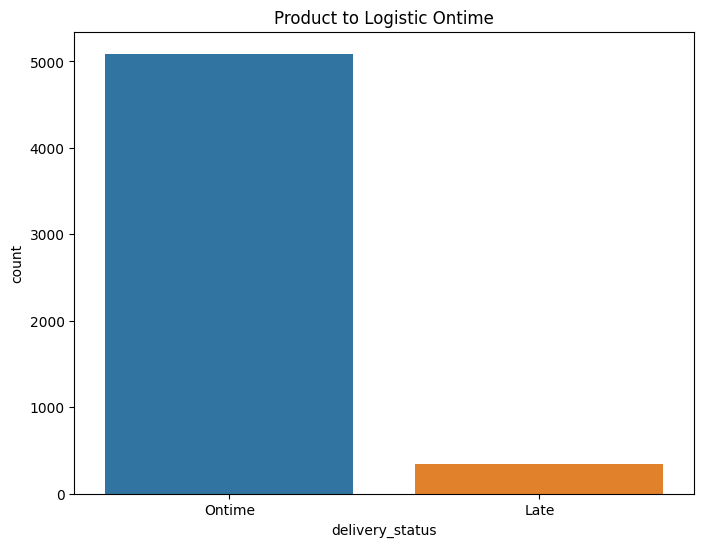

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Product to Logistic Ontime')
sns.countplot(data=delivery[delivery['to_logistic_status']=='Ontime'],x='delivery_status')

In [ ]:
# % of late order when deliver to logistic partner ontime
lg_ontime[lg_ontime['delivery_status']=='Late']['order_id'].count()/lg_ontime['order_id'].count()

0.06210836712126797

In [ ]:
# % of late order when deliver to logistic partner late
lg_late[lg_late['delivery_status']=='Late']['order_id'].count()/lg_late['order_id'].count()

0.18796992481203006

<Axes: title={'center': 'Product to Logistic Late'}, xlabel='delivery_status', ylabel='count'>

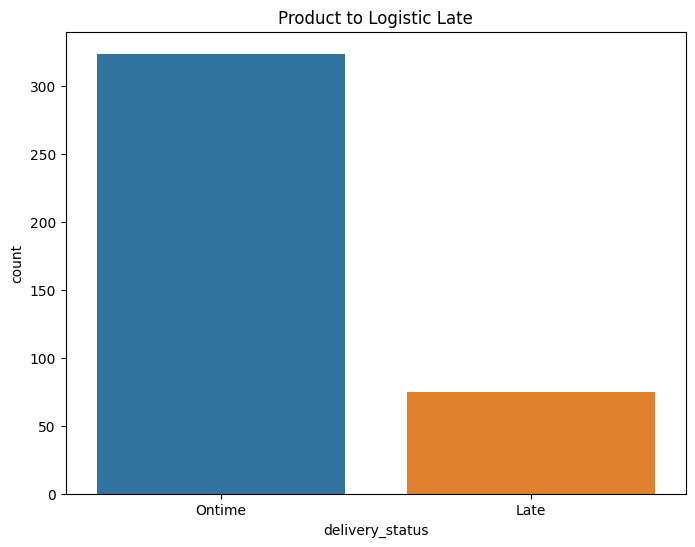

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Product to Logistic Late')
sns.countplot(data=delivery[delivery['to_logistic_status']=='Late'],x='delivery_status')

In [ ]:
delivery['to_logistic_day'] = delivery['to_logistic_day'].replace('-','')

In [ ]:
day =delivery.groupby('delivery_status')['to_logistic_day'].mean().reset_index()

In [ ]:
day['Avg Product to Logistic day']=pd.Series([4.05,2.33],index=day.index)

In [ ]:
#avg to logistic partner delivery time
day

,delivery_status,to_logistic_day,Avg Product to Logistic day
0,Late,4 days 01:18:47.968446601,4.05
1,Ontime,2 days 07:55:36.540735266,2.33


<Axes: title={'center': 'Avg Product to Logistic day'}, xlabel='delivery_status', ylabel='Avg Product to Logistic day'>

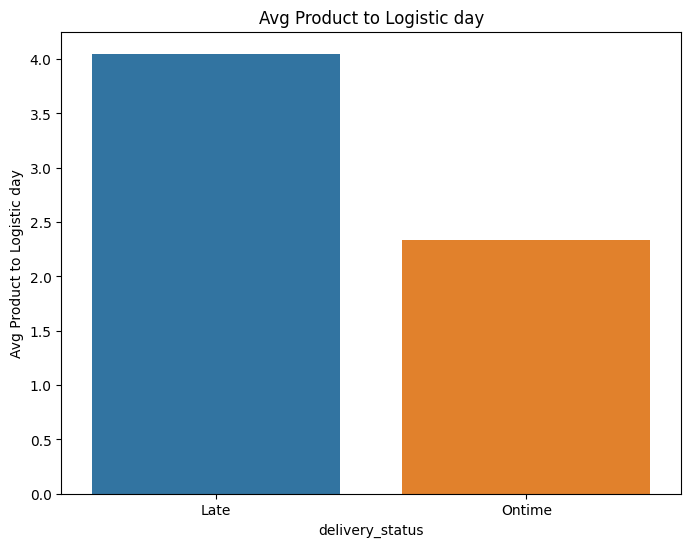

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Avg Product to Logistic day')
sns.barplot(data=day,x='delivery_status',y='Avg Product to Logistic day')

In [ ]:
# define sellers location and customers location
location=[]
for x in delivery.index:
  if delivery['customer_city'][x] == delivery['seller_city'][x]:
    location.append('Same city')
  elif delivery['customer_state'][x] == delivery['seller_state'][x]:
    location.append('Same state')
  else:
    location.append('Different state')

In [ ]:
delivery['location_status']= pd.Series(location,index= delivery.index)

In [ ]:
same_city = delivery[delivery['location_status'] == 'Same city']
same_state = delivery[delivery['location_status'] == 'Same state']
diff_state = delivery[delivery['location_status'] == 'Different state']

In [ ]:
#% late order when customers and sellers are in the same city
same_city[same_city['delivery_status']=='Late']['order_id'].count()/same_city['order_id'].count()

0.039755351681957186

<Axes: title={'center': 'Same city'}, xlabel='delivery_status', ylabel='count'>

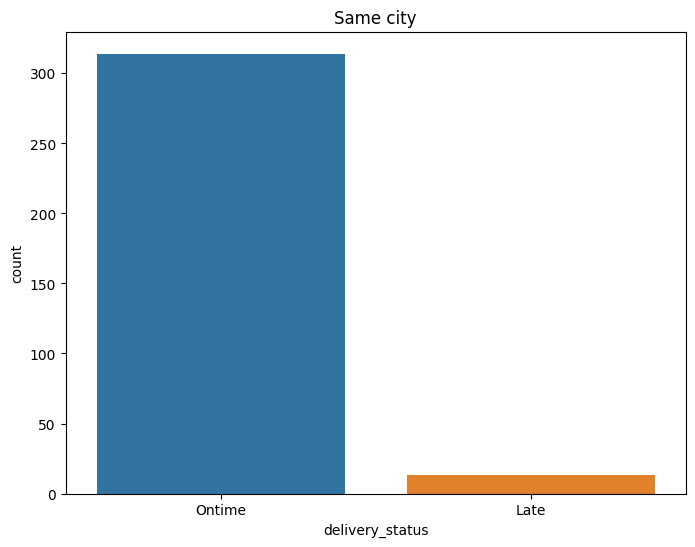

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Same city')
sns.countplot(data=same_city,x='delivery_status')

In [ ]:
#% late order when customers and sellers are in the same state
same_state[same_state['delivery_status']=='Late']['order_id'].count()/same_state['order_id'].count()

0.047872340425531915

<Axes: title={'center': 'Same state'}, xlabel='delivery_status', ylabel='count'>

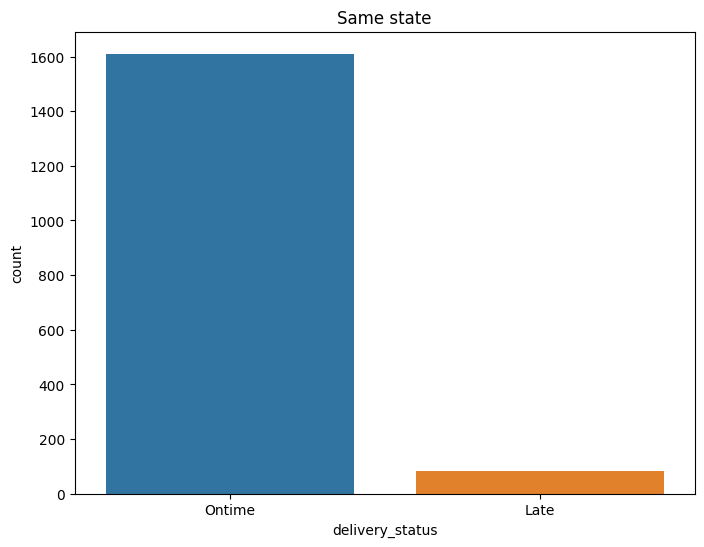

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Same state')
sns.countplot(data=same_state,x='delivery_status')

In [ ]:
#% late order when customers and sellers are in different state
diff_state[diff_state['delivery_status']=='Late']['order_id'].count()/diff_state['order_id'].count()

0.08355228586442459

<Axes: title={'center': 'Diff state'}, xlabel='delivery_status', ylabel='count'>

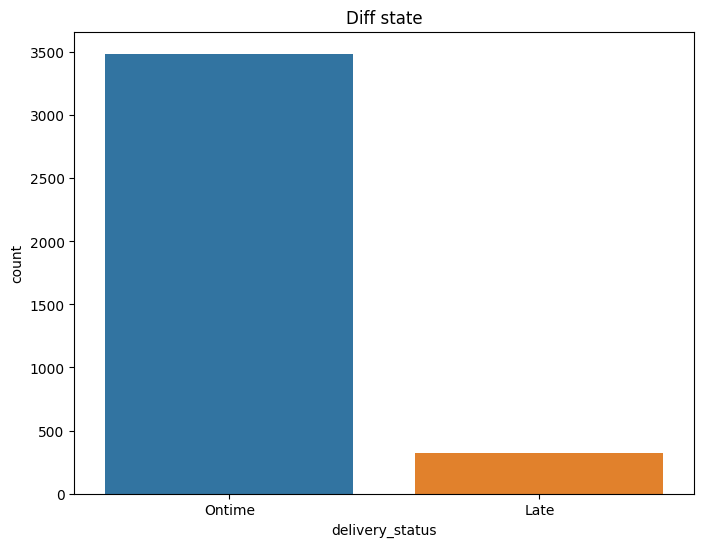

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Diff state')
sns.countplot(data=diff_state,x='delivery_status')

In [ ]:
# cities sort by number of orders descending
delivery.groupby('customer_city')['order_id'].count().sort_values(ascending=False)/delivery.shape[0]

customer_city
sao paulo         0.141116
rio de janeiro    0.077082
brasilia          0.024721
belo horizonte    0.021803
curitiba          0.018026
                    ...   
mairi             0.000172
mairipora         0.000172
mambai            0.000172
mambore           0.000172
xinguara          0.000172
Name: order_id, Length: 1160, dtype: float64

In [ ]:
# states sort by number of order descending
delivery.groupby('customer_state')['order_id'].count().sort_values(ascending=False)/delivery.shape[0]

customer_state
SP    0.381974
RJ    0.144034
MG    0.106781
PR    0.050987
RS    0.039142
BA    0.038627
SC    0.031416
PE    0.027983
ES    0.025064
DF    0.024721
GO    0.024378
CE    0.022661
PA    0.012532
MT    0.010472
MA    0.010129
RN    0.008069
PB    0.007039
PI    0.007039
MS    0.006352
AL    0.006009
TO    0.004979
SE    0.003433
RO    0.002403
AM    0.001545
AP    0.001373
AC    0.000687
RR    0.000172
Name: order_id, dtype: float64

## Calculate

### Growth rate

In [ ]:
top

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,delivery_status,Score_group,fee_status,converted_weight_g,final_weight
969,17f9863585a471e9ffe77c4d4f26ecea,d4336c36fbe83d4668606c4361932e1d,11750,peruibe,SP,83f0c4c6b1a3c31214ca8266dc888258,delivered,2018-01-27 00:10:10,2018-01-27 00:18:24,2018-02-09 13:09:34,2018-02-21 23:33:12,2018-03-09,84dbddcea45a1134640eec4e9c849d96,1,None,Das cinco cadeiras que comprei chegaram soment...,2018-02-22,2018-02-23 05:07:39,1,61a53738adc5c0e8d243553320f9ba1c,7c67e1448b00f6e969d365cea6b010ab,2018-02-09 00:18:24,79.97,10.86,sports_leisure,8809.0,52.0,52.0,17.0,8577,itaquaquecetuba,SP,Ontime,Low score,None,7661.333333,8809.000000
970,17f9863585a471e9ffe77c4d4f26ecea,d4336c36fbe83d4668606c4361932e1d,11750,peruibe,SP,83f0c4c6b1a3c31214ca8266dc888258,delivered,2018-01-27 00:10:10,2018-01-27 00:18:24,2018-02-09 13:09:34,2018-02-21 23:33:12,2018-03-09,84dbddcea45a1134640eec4e9c849d96,1,None,Das cinco cadeiras que comprei chegaram soment...,2018-02-22,2018-02-23 05:07:39,3,61a53738adc5c0e8d243553320f9ba1c,7c67e1448b00f6e969d365cea6b010ab,2018-02-09 00:18:24,79.97,10.86,sports_leisure,8809.0,52.0,52.0,17.0,8577,itaquaquecetuba,SP,Ontime,Low score,None,7661.333333,8809.000000
971,17f9863585a471e9ffe77c4d4f26ecea,d4336c36fbe83d4668606c4361932e1d,11750,peruibe,SP,83f0c4c6b1a3c31214ca8266dc888258,delivered,2018-01-27 00:10:10,2018-01-27 00:18:24,2018-02-09 13:09:34,2018-02-21 23:33:12,2018-03-09,84dbddcea45a1134640eec4e9c849d96,1,None,Das cinco cadeiras que comprei chegaram soment...,2018-02-22,2018-02-23 05:07:39,5,61a53738adc5c0e8d243553320f9ba1c,7c67e1448b00f6e969d365cea6b010ab,2018-02-09 00:18:24,79.97,10.86,sports_leisure,8809.0,52.0,52.0,17.0,8577,itaquaquecetuba,SP,Ontime,Low score,None,7661.333333,8809.000000
972,ff03c28afb14c93650bf591cb49fe327,f943b83abc6dc853db41b32672451845,14980,sales,SP,923cf1bc71993b447259c9e8bf54eb07,delivered,2018-03-01 14:20:46,2018-03-01 15:15:43,2018-03-12 16:38:51,2018-03-20 20:02:42,2018-04-04,ecce64ee98e7b5e54b123a9448b4e922,5,None,None,2018-03-21,2018-03-22 14:54:59,1,61a53738adc5c0e8d243553320f9ba1c,7c67e1448b00f6e969d365cea6b010ab,2018-03-15 15:15:43,89.97,24.94,sports_leisure,8809.0,52.0,52.0,17.0,8577,itaquaquecetuba,SP,Ontime,High score,None,7661.333333,8809.000000
973,093e5958897592f409553d0344ce50c2,97f97fe763e10c170a7bfb484d787f89,12243,sao jose dos campos,SP,0764f8b9a45b0305b75e1bbd614ffaaa,delivered,2017-09-16 21:00:06,2017-09-16 21:10:10,2017-09-27 22:24:30,2017-10-01 11:52:06,2017-10-06,94c0e9eae0f6b2c3c12026ac9bd85c70,1,None,comprei a cadeira em corino e veio em tecido!,2017-10-02,2017-10-03 16:27:31,1,61a53738adc5c0e8d243553320f9ba1c,7c67e1448b00f6e969d365cea6b010ab,2017-09-27 21:10:10,89.97,21.28,sports_leisure,8809.0,52.0,52.0,17.0,8577,itaquaquecetuba,SP,Ontime,Low score,None,7661.333333,8809.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112359,193422684d7e12df2ca405f88df5d891,da6c3ad897704760efba1dafc9f7ff8b,13424,piracicaba,SP,0e19122f9fa8f2ac31d7ee9742b7d98b,delivered,2017-06-26 16:04:07,2017-06-26 16:15:21,2017-06-29 10:03:14,2017-07-03 12:33:38,2017-07-14,2baffcfdc72ed76a22721dc90ed13f07,5,None,None,2017-07-04,2017-07-05 17:30:02,1,7f601afbca26d221fc2d957b6e211e72,fd312b6bf05efac6c3772d5b52205d8a,2017-06-30 16:15:21,29.90,11.85,health_beauty,600.0,20.0,30.0,20.0,18111,votorantim,SP,Ontime,High score,None,2000.000000,2000.00000

In [ ]:
top['month'] = top['order_approved_at'].dt.to_period("M")

<ipython-input-110-e263c5c7845e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top['month'] = top['order_approved_at'].dt.to_period("M")


In [ ]:
watch = top[top['product_category_name']=='watches_gifts'].groupby('month')['price'].sum().reset_index()

In [ ]:
watch['growth'] = np.round(watch['price'].pct_change()*100,2)

In [ ]:
watch = watch.dropna()

In [ ]:
# watches_gifts monthly revenue growth rate
watch['growth'].mean()

23.758000000000003

In [ ]:
# watches_gifts monthly number of unique customer growth rate
watch2 = top[top['product_category_name']=='watches_gifts'].groupby('month')['customer_unique_id'].nunique().reset_index()
watch2['growth'] = np.round(watch2['customer_unique_id'].pct_change()*100,2)
watch2 = watch2.dropna()
watch2['growth'].mean()

33.062

In [ ]:
watch2

,month,customer_unique_id,growth
1,2017-01,11,120.00
2,2017-02,32,190.91
3,2017-03,75,134.38
4,2017-04,88,17.33
5,2017-05,125,42.05
6,2017-06,113,-9.60
7,2017-07,153,35.40
8,2017-08,195,27.45
9,2017-09,251,28.72
10,2017-10,283,12.75


### Seller

In [ ]:
# number of seller each category
seller = top.groupby('product_category_name')['seller_id'].nunique()
seller

product_category_name
bed_bath_table           194
computers_accessories    285
health_beauty            488
sports_leisure           477
watches_gifts             98
Name: seller_id, dtype: int64

In [ ]:
# revenue per seller of each category
ps = top.groupby('product_category_name')['price'].sum()/top.groupby('product_category_name')['seller_id'].nunique()
ps

product_category_name
bed_bath_table            5356.266443
computers_accessories     3183.035053
health_beauty             2560.284098
sports_leisure            2051.804759
watches_gifts            12153.102143
dtype: float64

### Shipping fee


In [ ]:
#avg shipping fee
fee = top.groupby('product_category_name')['freight_value'].mean()
fee

product_category_name
bed_bath_table           18.395424
computers_accessories    18.828890
health_beauty            18.888630
sports_leisure           19.483236
watches_gifts            16.766718
Name: freight_value, dtype: float64

### Weight

In [ ]:
top

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,delivery_status,Score_group,fee_status,converted_weight_g,final_weight,month
969,17f9863585a471e9ffe77c4d4f26ecea,d4336c36fbe83d4668606c4361932e1d,11750,peruibe,SP,83f0c4c6b1a3c31214ca8266dc888258,delivered,2018-01-27 00:10:10,2018-01-27 00:18:24,2018-02-09 13:09:34,2018-02-21 23:33:12,2018-03-09,84dbddcea45a1134640eec4e9c849d96,1,None,Das cinco cadeiras que comprei chegaram soment...,2018-02-22,2018-02-23 05:07:39,1,61a53738adc5c0e8d243553320f9ba1c,7c67e1448b00f6e969d365cea6b010ab,2018-02-09 00:18:24,79.97,10.86,sports_leisure,8809.0,52.0,52.0,17.0,8577,itaquaquecetuba,SP,Ontime,Low score,None,7661.333333,8809.000000,2018-01
970,17f9863585a471e9ffe77c4d4f26ecea,d4336c36fbe83d4668606c4361932e1d,11750,peruibe,SP,83f0c4c6b1a3c31214ca8266dc888258,delivered,2018-01-27 00:10:10,2018-01-27 00:18:24,2018-02-09 13:09:34,2018-02-21 23:33:12,2018-03-09,84dbddcea45a1134640eec4e9c849d96,1,None,Das cinco cadeiras que comprei chegaram soment...,2018-02-22,2018-02-23 05:07:39,3,61a53738adc5c0e8d243553320f9ba1c,7c67e1448b00f6e969d365cea6b010ab,2018-02-09 00:18:24,79.97,10.86,sports_leisure,8809.0,52.0,52.0,17.0,8577,itaquaquecetuba,SP,Ontime,Low score,None,7661.333333,8809.000000,2018-01
971,17f9863585a471e9ffe77c4d4f26ecea,d4336c36fbe83d4668606c4361932e1d,11750,peruibe,SP,83f0c4c6b1a3c31214ca8266dc888258,delivered,2018-01-27 00:10:10,2018-01-27 00:18:24,2018-02-09 13:09:34,2018-02-21 23:33:12,2018-03-09,84dbddcea45a1134640eec4e9c849d96,1,None,Das cinco cadeiras que comprei chegaram soment...,2018-02-22,2018-02-23 05:07:39,5,61a53738adc5c0e8d243553320f9ba1c,7c67e1448b00f6e969d365cea6b010ab,2018-02-09 00:18:24,79.97,10.86,sports_leisure,8809.0,52.0,52.0,17.0,8577,itaquaquecetuba,SP,Ontime,Low score,None,7661.333333,8809.000000,2018-01
972,ff03c28afb14c93650bf591cb49fe327,f943b83abc6dc853db41b32672451845,14980,sales,SP,923cf1bc71993b447259c9e8bf54eb07,delivered,2018-03-01 14:20:46,2018-03-01 15:15:43,2018-03-12 16:38:51,2018-03-20 20:02:42,2018-04-04,ecce64ee98e7b5e54b123a9448b4e922,5,None,None,2018-03-21,2018-03-22 14:54:59,1,61a53738adc5c0e8d243553320f9ba1c,7c67e1448b00f6e969d365cea6b010ab,2018-03-15 15:15:43,89.97,24.94,sports_leisure,8809.0,52.0,52.0,17.0,8577,itaquaquecetuba,SP,Ontime,High score,None,7661.333333,8809.000000,2018-03
973,093e5958897592f409553d0344ce50c2,97f97fe763e10c170a7bfb484d787f89,12243,sao jose dos campos,SP,0764f8b9a45b0305b75e1bbd614ffaaa,delivered,2017-09-16 21:00:06,2017-09-16 21:10:10,2017-09-27 22:24:30,2017-10-01 11:52:06,2017-10-06,94c0e9eae0f6b2c3c12026ac9bd85c70,1,None,comprei a cadeira em corino e veio em tecido!,2017-10-02,2017-10-03 16:27:31,1,61a53738adc5c0e8d243553320f9ba1c,7c67e1448b00f6e969d365cea6b010ab,2017-09-27 21:10:10,89.97,21.28,sports_leisure,8809.0,52.0,52.0,17.0,8577,itaquaquecetuba,SP,Ontime,Low score,None,7661.333333,8809.000000,2017-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112359,193422684d7e12df2ca405f88df5d891,da6c3ad897704760efba1dafc9f7ff8b,13424,piracicaba,SP,0e19122f9fa8f2ac31d7ee9742b7d98b,delivered,2017-06-26 16:04:07,2017-06-26 16:15:21,2017-06-29 10:03:14,2017-07-03 12:33:38,2017-07-14,2baffcfdc72ed76a22721dc90ed13f07,5,None,None,2017-07-04,2017-07-05 17:30:02,1,7f601afbca26d221fc2d957b6e211e72,fd312b6bf05efac6c3772d5b52205d8a,2017-06-30 16:15:21,29.90,11.85,health_beauty,600.0,20.0,30.0,20.0,18111,votoranti

In [ ]:
#avg final weight of each category
weight = top.groupby('product_category_name')['final_weight'].mean()
weight

product_category_name
bed_bath_table           3213.807327
computers_accessories    1258.225368
health_beauty            1537.969126
sports_leisure           2657.595809
watches_gifts             729.067847
Name: final_weight, dtype: float64

### Fee by location

In [ ]:
delivery

,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,freight_value,order_estimated_delivery_date,shipping_limit_date,customer_city,customer_state,seller_city,seller_state,review_score,delivery_status,Score_group,product_category_name,to_logistic_status,to_logistic_day,location_status
4100,7a04a9036cd32390e8f17eaccd2dcef4,2018-02-05 23:26:08,2018-02-06 23:29:58,2018-02-07 17:17:42,2018-02-19 23:17:56,21.15,2018-03-09,2018-02-13 23:29:58,natal,RN,sao paulo,SP,5,Ontime,High score,watches_gifts,Ontime,0 days 17:47:44,Different state
4101,5f42573c60286a6f9d6a3809352c86e0,2018-05-26 19:36:13,2018-05-26 19:49:43,2018-05-28 13:45:00,2018-06-01 13:32:45,15.23,2018-07-18,2018-06-04 19:49:43,rio de janeiro,RJ,sao paulo,SP,1,Ontime,Low score,watches_gifts,Ontime,1 days 17:55:17,Different state
4102,5f42573c60286a6f9d6a3809352c86e0,2018-05-26 19:36:13,2018-05-26 19:49:43,2018-05-28 13:45:00,2018-06-01 13:32:45,15.23,2018-07-18,2018-06-04 19:49:43,rio de janeiro,RJ,sao paulo,SP,1,Ontime,Low score,watches_gifts,Ontime,1 days 17:55:17,Different state
4103,5f42573c60286a6f9d6a3809352c86e0,2018-05-26 19:36:13,2018-05-26 19:49:43,2018-05-28 13:45:00,2018-06-01 13:32:45,15.23,2018-07-18,2018-06-04 19:49:43,rio de janeiro,RJ,sao paulo,SP,1,Ontime,Low score,watches_gifts,Ontime,1 days 17:55:17,Different state
4104,44879a8f19c5e8a5e9278477b29a29ea,2018-08-23 20:56:41,2018-08-25 02:35:16,2018-08-27 14:21:00,2018-08-30 20:38:29,18.24,2018-10-04,2018-08-28 02:35:16,mangaratiba,RJ,sao paulo,SP,5,Ontime,High score,watches_gifts,Ontime,2 days 11:45:44,Different state
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111828,63dbe0c8e63e5f1b4deec09d4f044a7f,2017-11-27 20:01:56,2017-11-27 20:19:11,2017-11-28 20:10:57,2017-12-12 18:43:32,21.69,2017-12-29,2017-12-01 20:19:11,campina grande,PB,feira de santana,BA,4,Ontime,High score,watches_gifts,Ontime,0 days 23:51:46,Different state
111829,4fbc8d6f2f4db3e789d5a876fa349b56,2018-02-02 21:38:36,2018-02-03 20:10:18,2018-02-08 01:04:18,2018-07-20 23:37:50,27.24,2018-03-08,2018-02-08 20:10:18,capinzal do norte,MA,feira de santana,BA,5,Late,High score,watches_gifts,Ontime,4 days 04:54:00,Different state
112085,61d5f1dcdf9b023ea7622b65d2362e4f,2018-03-30 09:27:22,2018-03-30 10:10:10,2018-04-02 19:59:04,2018-04-11 16:59:55,17.69,2018-04-18,2018-04-05 10:10:10,itariri,SP,guarulhos,SP,1,Ontime,Low score,watches_gifts,Ontime,3 days 09:48:54,Same state
112151,ac284fb15053d666dfb6128354f0e662,2018-08-22 14:14:50,2018-08-22 14:25:19,2018-08-22 13:46:00,2018-08-28 21:32:27,24.82,2018-09-14,2018-08-28 14:25:19,sao mateus,ES,sao paulo,SP,5,Ontime,High score,watches_gifts,Ontime,-1 days +23:20:41,Different state


In [ ]:
#avg shipping fee based on customer and seller location
locafee = delivery.groupby('location_status')['freight_value'].mean()
locafee

location_status
Different state    19.728187
Same city           8.152752
Same state         11.710786
Name: freight_value, dtype: float64

In [ ]:
locafee/locafee[1]

location_status
Different state    2.419819
Same city          1.000000
Same state         1.436421
Name: freight_value, dtype: float64

### Lowscore rating

In [ ]:
#number of low score rating
low = top[top['Score_group']=='Low score'].groupby('product_category_name')['order_id'].count()
low

product_category_name
bed_bath_table           2100
computers_accessories    1421
health_beauty            1296
sports_leisure           1217
watches_gifts             949
Name: order_id, dtype: int64

# Machine Learning

## Preprocessing

In [ ]:
%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

sns.set_style("whitegrid")

In [ ]:
rate=[]
for x in merged1.index:
  if merged1['Score_group'][x] == 'High score':
    rate.append(1)
  else:
    rate.append(0)

In [ ]:
merged1['rate'] = pd.Series(rate,index=merged1.index)

In [ ]:
merged1

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,delivery_status,Score_group,fee_status,rate
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,88b8b52d46df026a9d1ad2136a59b30b,4,None,None,2017-05-26,2017-05-30 22:34:40,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,office_furniture,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,Ontime,High score,None,1
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,7fc63200f12eebb5f387856afdd63db8,1,None,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29,2017-12-01 19:41:59,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,office_furniture,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,Ontime,Low score,None,0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,7fc63200f12eebb5f387856afdd63db8,1,None,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29,2017-12-01 19:41:59,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,office_furniture,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,Ontime,Low score,None,0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12,251191809e37c1cffc16865947c18a4d,3,None,"Produto compatível com seu valor, muito bonito...",2017-05-27,2017-05-28 02:43:16,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,office_furniture,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,Ontime,Average,None,0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22,f7123bac5b91a0e2e38d8b41fd1206f4,4,None,Entregou antes do prazo,2018-03-01,2018-03-02 11:11:24,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,office_furniture,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,Ontime,High score,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112366,59168d27c5da6a50e3d1f03d482e80b2,393c2ace23a135d0bcc7e70167448e16,47800,barreiras,BA,c382d84d35f4d874b1f1c372f4bde27c,delivered,2018-07-20 09:42:40,2018-07-20 15:05:22,2018-07-23 11:53:00,2018-07-27 11:54:15,2018-08-14,ad5b887e12660a77a4e7f0b5130f36f3,5,Perfeito,"Ótimo produto, entrega rápida, superou minhas ...",2018-07-28,2018-07-30 16:48:30,1,731cf6fbf44cc64a9583fabe2c00750e,398cb257329ef7af7f1943a8974a3cbc,2018-08-01 15:05:22,145.90,15.47,drinks,2250.0,16.0,28.0,16.0,40285,salvador,BA,Ontime,High score,None,1
112368,eda10d7eb51a675d000956fa1aabc7dd,5c22dbb9d8b5385953f2f1e6d9d115a7,39920,jordania,MG,b494f624c631105b24fe497277085909,delivered,

In [ ]:
merged1['volume']=merged1['product_length_cm']*merged1['product_height_cm']*merged1['product_width_cm']

In [ ]:
deli=[]
for x in merged1.index:
  if merged1['order_delivered_carrier_date'][x] < merged1['shipping_limit_date'][x]:
    deli.append(1)
  else:
    deli.append(0)

In [ ]:
merged1['logisstatus']=pd.Series(deli,index=merged1.index)

In [ ]:
location=[]
for x in merged1.index:
  if merged1['customer_city'][x] == merged1['seller_city'][x]:
    location.append('Same city')
  elif merged1['customer_state'][x] == merged1['seller_state'][x]:
    location.append('Same state')
  else:
    location.append('Different state')

In [ ]:
merged1['locationstatus']=pd.Series(location,index=merged1.index)

In [ ]:
merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111836 entries, 0 to 112371
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    111836 non-null  object        
 1   customer_unique_id             111836 non-null  object        
 2   customer_zip_code_prefix       111836 non-null  int64         
 3   customer_city                  111836 non-null  object        
 4   customer_state                 111836 non-null  object        
 5   order_id                       111836 non-null  object        
 6   order_status                   111836 non-null  object        
 7   order_purchase_timestamp       111836 non-null  datetime64[ns]
 8   order_approved_at              111821 non-null  datetime64[ns]
 9   order_delivered_carrier_date   111121 non-null  datetime64[ns]
 10  order_delivered_customer_date  110005 non-null  datetime64[ns]
 11  

In [ ]:
merged1.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'delivery_status', 'Score_group', 'fee_status', 'rate', 'volume',
       'logisstatus', 'locationstatus'],
      dtype='object')

In [ ]:
machine_learning = merged1[['price','freight_value','delivery_status','rate',"product_category_name", 'logisstatus', 'locationstatus','product_weight_g','fee_status','order_status','volume','seller_state','customer_state']]


In [ ]:
machine_learning

,price,freight_value,delivery_status,rate,product_category_name,logisstatus,locationstatus,product_weight_g,fee_status,order_status,volume,seller_state,customer_state
0,124.99,21.88,Ontime,1,office_furniture,0,Same state,8683.0,None,delivered,107136.0,SP,SP
1,112.99,24.90,Ontime,0,office_furniture,1,Different state,8683.0,None,delivered,107136.0,SP,PA
2,112.99,24.90,Ontime,0,office_furniture,1,Different state,8683.0,None,delivered,107136.0,SP,PA
3,124.99,15.62,Ontime,0,office_furniture,1,Different state,8683.0,None,delivered,107136.0,SP,RS
4,106.99,30.59,Ontime,1,office_furniture,0,Different state,8683.0,None,delivered,107136.0,SP,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112366,145.90,15.47,Ontime,1,drinks,1,Same state,2250.0,None,delivered,7168.0,BA,BA
112368,49.90,22.28,Ontime,1,pet_shop,1,Different state,200.0,None,delivered,8960.0,PR,MG
112369,730.00,45.98,Ontime,0,home_construction,0,Same state,15008.0,None,shipped,74307.0,SP,SP
112370,135.98,88.46,Ontime,1,garden_tools,1,Different state,3211.0,None,delivered,41976.0,PR,GO


In [ ]:
machine_learning.replace({"delivery_status": {"Ontime": 1, "Late": 0}}, inplace=True)

In [ ]:
machine_learning.replace({"fee_status": {"Freeship": 1, "None": 0}}, inplace=True)

In [ ]:
machine_learning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111836 entries, 0 to 112371
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   price                  111836 non-null  float64
 1   freight_value          111836 non-null  float64
 2   delivery_status        111836 non-null  int64  
 3   rate                   111836 non-null  int64  
 4   product_category_name  110230 non-null  object 
 5   logisstatus            111836 non-null  int64  
 6   locationstatus         111836 non-null  object 
 7   product_weight_g       111818 non-null  float64
 8   fee_status             111836 non-null  int64  
 9   order_status           111836 non-null  object 
 10  volume                 111818 non-null  float64
 11  seller_state           111836 non-null  object 
 12  customer_state         111836 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 16.0+ MB


In [ ]:
machine_learning=machine_learning.dropna()

In [ ]:
machine_learning

,price,freight_value,delivery_status,rate,product_category_name,logisstatus,locationstatus,product_weight_g,fee_status,order_status,volume,seller_state,customer_state
0,124.99,21.88,1,1,office_furniture,0,Same state,8683.0,0,delivered,107136.0,SP,SP
1,112.99,24.90,1,0,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,PA
2,112.99,24.90,1,0,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,PA
3,124.99,15.62,1,0,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,RS
4,106.99,30.59,1,1,office_furniture,0,Different state,8683.0,0,delivered,107136.0,SP,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112366,145.90,15.47,1,1,drinks,1,Same state,2250.0,0,delivered,7168.0,BA,BA
112368,49.90,22.28,1,1,pet_shop,1,Different state,200.0,0,delivered,8960.0,PR,MG
112369,730.00,45.98,1,0,home_construction,0,Same state,15008.0,0,shipped,74307.0,SP,SP
112370,135.98,88.46,1,1,garden_tools,1,Different state,3211.0,0,delivered,41976.0,PR,GO


In [ ]:
X = machine_learning.drop("rate", axis=1)
y = machine_learning.rate.values

In [ ]:
X.shape

(110229, 12)

In [ ]:
y.shape

(110229,)

## Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
X

,price,freight_value,delivery_status,product_category_name,logisstatus,locationstatus,product_weight_g,fee_status,order_status,volume,seller_state,customer_state
0,124.99,21.88,1,office_furniture,0,Same state,8683.0,0,delivered,107136.0,SP,SP
1,112.99,24.90,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,PA
2,112.99,24.90,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,PA
3,124.99,15.62,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,RS
4,106.99,30.59,1,office_furniture,0,Different state,8683.0,0,delivered,107136.0,SP,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...
112366,145.90,15.47,1,drinks,1,Same state,2250.0,0,delivered,7168.0,BA,BA
112368,49.90,22.28,1,pet_shop,1,Different state,200.0,0,delivered,8960.0,PR,MG
112369,730.00,45.98,1,home_construction,0,Same state,15008.0,0,shipped,74307.0,SP,SP
112370,135.98,88.46,1,garden_tools,1,Different state,3211.0,0,delivered,41976.0,PR,GO


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
num_features = ["price", "freight_value",'product_weight_g','volume']

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train_num_scaled = scaler.fit_transform(X_train[num_features])

In [ ]:
X_train[num_features]

,price,freight_value,product_weight_g,volume
9357,59.90,13.44,1800.0,32560.0
78357,70.25,23.07,1575.0,12558.0
103749,498.00,69.22,13150.0,88200.0
36271,75.00,7.87,175.0,15000.0
104783,14.99,15.10,900.0,24300.0
...,...,...,...,...
55681,429.90,38.36,5000.0,25069.0
78017,119.00,15.58,500.0,3600.0
105402,39.90,15.10,200.0,3328.0
860,196.99,49.05,17000.0,87696.0


In [ ]:
X_train_num_scaled

array([[0.0125929 , 0.03280609, 0.0445269 , 0.10941765],
       [0.01480012, 0.05631224, 0.03896104, 0.04185245],
       [0.10602135, 0.16896114, 0.32529375, 0.29736522],
       ...,
       [0.00832774, 0.03685804, 0.00494743, 0.01067423],
       [0.04182848, 0.11972759, 0.42053185, 0.29566275],
       [0.03178614, 0.03112185, 0.04205318, 0.02515876]])

In [ ]:
X_test_num_scaled = scaler.transform(X_test[num_features])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
X

,price,freight_value,delivery_status,product_category_name,logisstatus,locationstatus,product_weight_g,fee_status,order_status,volume,seller_state,customer_state
0,124.99,21.88,1,office_furniture,0,Same state,8683.0,0,delivered,107136.0,SP,SP
1,112.99,24.90,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,PA
2,112.99,24.90,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,PA
3,124.99,15.62,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,RS
4,106.99,30.59,1,office_furniture,0,Different state,8683.0,0,delivered,107136.0,SP,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...
112366,145.90,15.47,1,drinks,1,Same state,2250.0,0,delivered,7168.0,BA,BA
112368,49.90,22.28,1,pet_shop,1,Different state,200.0,0,delivered,8960.0,PR,MG
112369,730.00,45.98,1,home_construction,0,Same state,15008.0,0,shipped,74307.0,SP,SP
112370,135.98,88.46,1,garden_tools,1,Different state,3211.0,0,delivered,41976.0,PR,GO


In [ ]:
cat_features = ['product_category_name','locationstatus','order_status','seller_state','customer_state']

In [ ]:
#encoder = OneHotEncoder(handle_unknown="ignore")
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
copy1 = X_train[cat_features]

In [ ]:
copy1 = copy1.apply(le.fit_transform, axis=0)

In [ ]:
copy1

,product_category_name,locationstatus,order_status,seller_state,customer_state
9357,42,2,1,22,25
78357,7,0,1,20,25
103749,0,0,1,8,4
36271,20,2,1,22,25
104783,5,0,1,22,8
...,...,...,...,...,...
55681,5,0,1,22,10
78017,59,0,1,22,22
105402,65,0,1,20,17
860,57,2,1,22,25


In [ ]:
copy1 = copy1.to_numpy()

In [ ]:
copy1

array([[42,  2,  1, 22, 25],
       [ 7,  0,  1, 20, 25],
       [ 0,  0,  1,  8,  4],
       ...,
       [65,  0,  1, 20, 17],
       [57,  2,  1, 22, 25],
       [ 7,  2,  1, 22, 25]])

In [ ]:
copy2 = X_test[cat_features]

In [ ]:
copy2 = copy2.apply(le.fit_transform, axis=0)

In [ ]:
copy2 = copy2.to_numpy()

In [ ]:
X

,price,freight_value,delivery_status,product_category_name,logisstatus,locationstatus,product_weight_g,fee_status,order_status,volume,seller_state,customer_state
0,124.99,21.88,1,office_furniture,0,Same state,8683.0,0,delivered,107136.0,SP,SP
1,112.99,24.90,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,PA
2,112.99,24.90,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,PA
3,124.99,15.62,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,RS
4,106.99,30.59,1,office_furniture,0,Different state,8683.0,0,delivered,107136.0,SP,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...
112366,145.90,15.47,1,drinks,1,Same state,2250.0,0,delivered,7168.0,BA,BA
112368,49.90,22.28,1,pet_shop,1,Different state,200.0,0,delivered,8960.0,PR,MG
112369,730.00,45.98,1,home_construction,0,Same state,15008.0,0,shipped,74307.0,SP,SP
112370,135.98,88.46,1,garden_tools,1,Different state,3211.0,0,delivered,41976.0,PR,GO


In [ ]:
remainding_features = ["delivery_status",'logisstatus','fee_status']
X_train_remained = X_train[remainding_features].values

In [ ]:
X_train_remained

array([[1, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       ...,
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0]])

In [ ]:
X_train_num_scaled

array([[0.0125929 , 0.03280609, 0.0445269 , 0.10941765],
       [0.01480012, 0.05631224, 0.03896104, 0.04185245],
       [0.10602135, 0.16896114, 0.32529375, 0.29736522],
       ...,
       [0.00832774, 0.03685804, 0.00494743, 0.01067423],
       [0.04182848, 0.11972759, 0.42053185, 0.29566275],
       [0.03178614, 0.03112185, 0.04205318, 0.02515876]])

In [ ]:
X_train_final = np.concatenate(
    [X_train_num_scaled, copy1, X_train_remained], axis=1
)

In [ ]:
X_train_final.shape

(88183, 12)

In [ ]:
X_test_remained = X_test[remainding_features].values

In [ ]:
X_test_final = np.concatenate(
    [X_test_num_scaled, copy2, X_test_remained], axis=1
)

In [ ]:
X_test_final.shape

(22046, 12)

## Model training

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train_final, y_train)

LogisticRegression()

In [ ]:
y_train_pred = lr.predict(X_train_final)
y_test_pred = lr.predict(X_test_final)

## Reporting

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
pd.Series(y).value_counts(normalize=True)

1    0.758657
0    0.241343
dtype: float64

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.75      0.25      0.37     21313
           1       0.80      0.97      0.88     66870

    accuracy                           0.80     88183
   macro avg       0.78      0.61      0.63     88183
weighted avg       0.79      0.80      0.76     88183



In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.10      0.17      5290
           1       0.78      0.99      0.87     16756

    accuracy                           0.78     22046
   macro avg       0.78      0.54      0.52     22046
weighted avg       0.78      0.78      0.70     22046



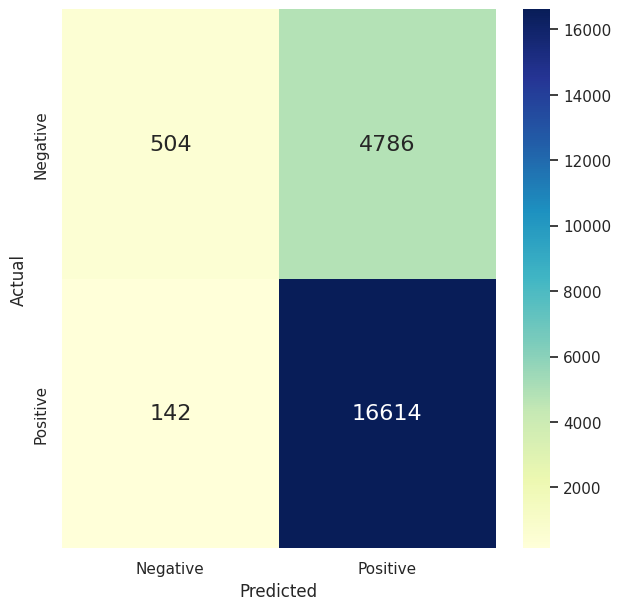

In [ ]:
data = confusion_matrix(y_test, y_test_pred)
df_cm = pd.DataFrame(
    data,
    columns=np.unique(["Negative", "Positive"]),
    index=np.unique(["Negative", "Positive"]),
)
# print(df_cm)
df_cm.index.name = "Actual"
df_cm.columns.name = "Predicted"
plt.figure(figsize=(7, 7))
sns.set(font_scale=1)  # for label size
sns.heatmap(df_cm, cmap="YlGnBu", annot=True, annot_kws={"size": 16},fmt="g")  # font size
plt.show()

## SMOTE

In [ ]:
X = machine_learning.drop("rate", axis=1)
y = machine_learning.rate.values

In [ ]:
X.shape

(110229, 12)

In [ ]:
y.shape

(110229,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
X

,price,freight_value,delivery_status,product_category_name,logisstatus,locationstatus,product_weight_g,fee_status,order_status,volume,seller_state,customer_state
0,124.99,21.88,1,office_furniture,0,Same state,8683.0,0,delivered,107136.0,SP,SP
1,112.99,24.90,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,PA
2,112.99,24.90,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,PA
3,124.99,15.62,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,RS
4,106.99,30.59,1,office_furniture,0,Different state,8683.0,0,delivered,107136.0,SP,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...
112366,145.90,15.47,1,drinks,1,Same state,2250.0,0,delivered,7168.0,BA,BA
112368,49.90,22.28,1,pet_shop,1,Different state,200.0,0,delivered,8960.0,PR,MG
112369,730.00,45.98,1,home_construction,0,Same state,15008.0,0,shipped,74307.0,SP,SP
112370,135.98,88.46,1,garden_tools,1,Different state,3211.0,0,delivered,41976.0,PR,GO


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
num_features = ["price", "freight_value",'product_weight_g','volume']

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train_num_scaled = scaler.fit_transform(X_train[num_features])

In [ ]:
X_train[num_features]

,price,freight_value,product_weight_g,volume
9357,59.90,13.44,1800.0,32560.0
78357,70.25,23.07,1575.0,12558.0
103749,498.00,69.22,13150.0,88200.0
36271,75.00,7.87,175.0,15000.0
104783,14.99,15.10,900.0,24300.0
...,...,...,...,...
55681,429.90,38.36,5000.0,25069.0
78017,119.00,15.58,500.0,3600.0
105402,39.90,15.10,200.0,3328.0
860,196.99,49.05,17000.0,87696.0


In [ ]:
X_train_num_scaled

array([[0.0125929 , 0.03280609, 0.0445269 , 0.10941765],
       [0.01480012, 0.05631224, 0.03896104, 0.04185245],
       [0.10602135, 0.16896114, 0.32529375, 0.29736522],
       ...,
       [0.00832774, 0.03685804, 0.00494743, 0.01067423],
       [0.04182848, 0.11972759, 0.42053185, 0.29566275],
       [0.03178614, 0.03112185, 0.04205318, 0.02515876]])

In [ ]:
X_test_num_scaled = scaler.transform(X_test[num_features])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
X

,price,freight_value,delivery_status,product_category_name,logisstatus,locationstatus,product_weight_g,fee_status,order_status,volume,seller_state,customer_state
0,124.99,21.88,1,office_furniture,0,Same state,8683.0,0,delivered,107136.0,SP,SP
1,112.99,24.90,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,PA
2,112.99,24.90,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,PA
3,124.99,15.62,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,RS
4,106.99,30.59,1,office_furniture,0,Different state,8683.0,0,delivered,107136.0,SP,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...
112366,145.90,15.47,1,drinks,1,Same state,2250.0,0,delivered,7168.0,BA,BA
112368,49.90,22.28,1,pet_shop,1,Different state,200.0,0,delivered,8960.0,PR,MG
112369,730.00,45.98,1,home_construction,0,Same state,15008.0,0,shipped,74307.0,SP,SP
112370,135.98,88.46,1,garden_tools,1,Different state,3211.0,0,delivered,41976.0,PR,GO


In [ ]:
cat_features = ['product_category_name','locationstatus','order_status','seller_state','customer_state']

In [ ]:
#encoder = OneHotEncoder(handle_unknown="ignore")
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
copy1 = X_train[cat_features]

In [ ]:
copy1 = copy1.apply(le.fit_transform, axis=0)

In [ ]:
copy1

,product_category_name,locationstatus,order_status,seller_state,customer_state
9357,42,2,1,22,25
78357,7,0,1,20,25
103749,0,0,1,8,4
36271,20,2,1,22,25
104783,5,0,1,22,8
...,...,...,...,...,...
55681,5,0,1,22,10
78017,59,0,1,22,22
105402,65,0,1,20,17
860,57,2,1,22,25


In [ ]:
copy1 = copy1.to_numpy()

In [ ]:
copy1

array([[42,  2,  1, 22, 25],
       [ 7,  0,  1, 20, 25],
       [ 0,  0,  1,  8,  4],
       ...,
       [65,  0,  1, 20, 17],
       [57,  2,  1, 22, 25],
       [ 7,  2,  1, 22, 25]])

In [ ]:
copy2 = X_test[cat_features]

In [ ]:
copy2 = copy2.apply(le.fit_transform, axis=0)

In [ ]:
copy2 = copy2.to_numpy()

In [ ]:
X

,price,freight_value,delivery_status,product_category_name,logisstatus,locationstatus,product_weight_g,fee_status,order_status,volume,seller_state,customer_state
0,124.99,21.88,1,office_furniture,0,Same state,8683.0,0,delivered,107136.0,SP,SP
1,112.99,24.90,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,PA
2,112.99,24.90,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,PA
3,124.99,15.62,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,RS
4,106.99,30.59,1,office_furniture,0,Different state,8683.0,0,delivered,107136.0,SP,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...
112366,145.90,15.47,1,drinks,1,Same state,2250.0,0,delivered,7168.0,BA,BA
112368,49.90,22.28,1,pet_shop,1,Different state,200.0,0,delivered,8960.0,PR,MG
112369,730.00,45.98,1,home_construction,0,Same state,15008.0,0,shipped,74307.0,SP,SP
112370,135.98,88.46,1,garden_tools,1,Different state,3211.0,0,delivered,41976.0,PR,GO


In [ ]:
remainding_features = ["delivery_status",'logisstatus','fee_status']
X_train_remained = X_train[remainding_features].values

In [ ]:
X_train_remained

array([[1, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       ...,
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0]])

In [ ]:
X_train_num_scaled

array([[0.0125929 , 0.03280609, 0.0445269 , 0.10941765],
       [0.01480012, 0.05631224, 0.03896104, 0.04185245],
       [0.10602135, 0.16896114, 0.32529375, 0.29736522],
       ...,
       [0.00832774, 0.03685804, 0.00494743, 0.01067423],
       [0.04182848, 0.11972759, 0.42053185, 0.29566275],
       [0.03178614, 0.03112185, 0.04205318, 0.02515876]])

In [ ]:
X_train_final = np.concatenate(
    [X_train_num_scaled, copy1, X_train_remained], axis=1
)

In [ ]:
X_train_final.shape

(88183, 12)

In [ ]:
X_test_remained = X_test[remainding_features].values

In [ ]:
X_test_final = np.concatenate(
    [X_test_num_scaled, copy2, X_test_remained], axis=1
)

In [ ]:
X_test_final.shape

(22046, 12)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.8)
X_train_final_resampled,y_train_resampled = smote.fit_resample(X_train_final,y_train)
pd.Series(y_train_resampled).value_counts()

1    66870
0    53496
dtype: int64

In [ ]:
X_train_final_resampled.shape

(120366, 12)

In [ ]:
lr.fit(X_train_final_resampled, y_train_resampled)

LogisticRegression()

In [ ]:
y_train_pred = lr.predict(X_train_final_resampled)
y_test_pred = lr.predict(X_test_final)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
pd.Series(y).value_counts(normalize=True)

1    0.758657
0    0.241343
dtype: float64

In [ ]:
print(classification_report(y_train_resampled, y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.28      0.41     53496
           1       0.62      0.96      0.75     66870

    accuracy                           0.65    120366
   macro avg       0.73      0.62      0.58    120366
weighted avg       0.72      0.65      0.60    120366



In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.24      0.36      5290
           1       0.80      0.98      0.88     16756

    accuracy                           0.80     22046
   macro avg       0.78      0.61      0.62     22046
weighted avg       0.79      0.80      0.76     22046



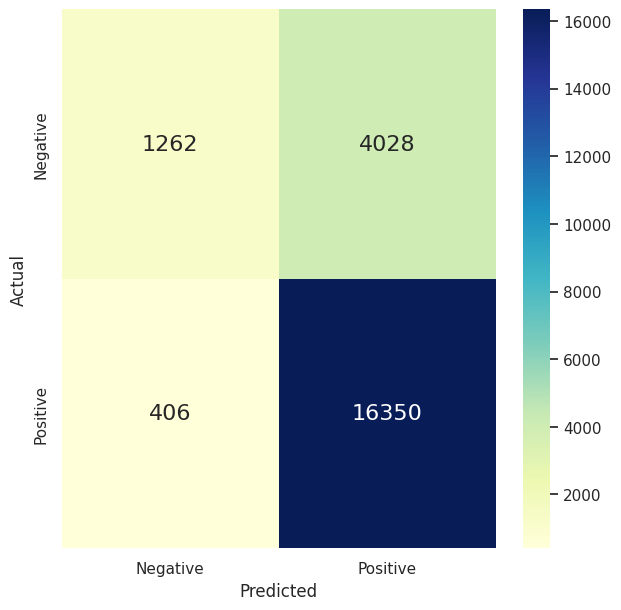

In [ ]:
data = confusion_matrix(y_test, y_test_pred)
df_cm = pd.DataFrame(
    data,
    columns=np.unique(["Negative", "Positive"]),
    index=np.unique(["Negative", "Positive"]),
)
# print(df_cm)
df_cm.index.name = "Actual"
df_cm.columns.name = "Predicted"
plt.figure(figsize=(7, 7))
sns.set(font_scale=1)  # for label size
sns.heatmap(df_cm, cmap="YlGnBu", annot=True, annot_kws={"size": 16},fmt="g")  # font size
plt.show()

## Undersampling

In [ ]:
X = machine_learning.drop("rate", axis=1)
y = machine_learning.rate.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
X

,price,freight_value,delivery_status,product_category_name,logisstatus,locationstatus,product_weight_g,fee_status,order_status,volume,seller_state,customer_state
0,124.99,21.88,1,office_furniture,0,Same state,8683.0,0,delivered,107136.0,SP,SP
1,112.99,24.90,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,PA
2,112.99,24.90,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,PA
3,124.99,15.62,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,RS
4,106.99,30.59,1,office_furniture,0,Different state,8683.0,0,delivered,107136.0,SP,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...
112366,145.90,15.47,1,drinks,1,Same state,2250.0,0,delivered,7168.0,BA,BA
112368,49.90,22.28,1,pet_shop,1,Different state,200.0,0,delivered,8960.0,PR,MG
112369,730.00,45.98,1,home_construction,0,Same state,15008.0,0,shipped,74307.0,SP,SP
112370,135.98,88.46,1,garden_tools,1,Different state,3211.0,0,delivered,41976.0,PR,GO


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
num_features = ["price", "freight_value",'product_weight_g','volume']

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train_num_scaled = scaler.fit_transform(X_train[num_features])

In [ ]:
X_train[num_features]

,price,freight_value,product_weight_g,volume
9357,59.90,13.44,1800.0,32560.0
78357,70.25,23.07,1575.0,12558.0
103749,498.00,69.22,13150.0,88200.0
36271,75.00,7.87,175.0,15000.0
104783,14.99,15.10,900.0,24300.0
...,...,...,...,...
55681,429.90,38.36,5000.0,25069.0
78017,119.00,15.58,500.0,3600.0
105402,39.90,15.10,200.0,3328.0
860,196.99,49.05,17000.0,87696.0


In [ ]:
X_train_num_scaled

array([[0.0125929 , 0.03280609, 0.0445269 , 0.10941765],
       [0.01480012, 0.05631224, 0.03896104, 0.04185245],
       [0.10602135, 0.16896114, 0.32529375, 0.29736522],
       ...,
       [0.00832774, 0.03685804, 0.00494743, 0.01067423],
       [0.04182848, 0.11972759, 0.42053185, 0.29566275],
       [0.03178614, 0.03112185, 0.04205318, 0.02515876]])

In [ ]:
X_test_num_scaled = scaler.transform(X_test[num_features])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
X

,price,freight_value,delivery_status,product_category_name,logisstatus,locationstatus,product_weight_g,fee_status,order_status,volume,seller_state,customer_state
0,124.99,21.88,1,office_furniture,0,Same state,8683.0,0,delivered,107136.0,SP,SP
1,112.99,24.90,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,PA
2,112.99,24.90,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,PA
3,124.99,15.62,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,RS
4,106.99,30.59,1,office_furniture,0,Different state,8683.0,0,delivered,107136.0,SP,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...
112366,145.90,15.47,1,drinks,1,Same state,2250.0,0,delivered,7168.0,BA,BA
112368,49.90,22.28,1,pet_shop,1,Different state,200.0,0,delivered,8960.0,PR,MG
112369,730.00,45.98,1,home_construction,0,Same state,15008.0,0,shipped,74307.0,SP,SP
112370,135.98,88.46,1,garden_tools,1,Different state,3211.0,0,delivered,41976.0,PR,GO


In [ ]:
cat_features = ['product_category_name','locationstatus','order_status','seller_state','customer_state']

In [ ]:
#encoder = OneHotEncoder(handle_unknown="ignore")
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
copy1 = X_train[cat_features]

In [ ]:
copy1 = copy1.apply(le.fit_transform, axis=0)

In [ ]:
copy1

,product_category_name,locationstatus,order_status,seller_state,customer_state
9357,42,2,1,22,25
78357,7,0,1,20,25
103749,0,0,1,8,4
36271,20,2,1,22,25
104783,5,0,1,22,8
...,...,...,...,...,...
55681,5,0,1,22,10
78017,59,0,1,22,22
105402,65,0,1,20,17
860,57,2,1,22,25


In [ ]:
copy1 = copy1.to_numpy()

In [ ]:
copy1

array([[42,  2,  1, 22, 25],
       [ 7,  0,  1, 20, 25],
       [ 0,  0,  1,  8,  4],
       ...,
       [65,  0,  1, 20, 17],
       [57,  2,  1, 22, 25],
       [ 7,  2,  1, 22, 25]])

In [ ]:
copy2 = X_test[cat_features]

In [ ]:
copy2 = copy2.apply(le.fit_transform, axis=0)

In [ ]:
copy2 = copy2.to_numpy()

In [ ]:
X

,price,freight_value,delivery_status,product_category_name,logisstatus,locationstatus,product_weight_g,fee_status,order_status,volume,seller_state,customer_state
0,124.99,21.88,1,office_furniture,0,Same state,8683.0,0,delivered,107136.0,SP,SP
1,112.99,24.90,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,PA
2,112.99,24.90,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,PA
3,124.99,15.62,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,RS
4,106.99,30.59,1,office_furniture,0,Different state,8683.0,0,delivered,107136.0,SP,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...
112366,145.90,15.47,1,drinks,1,Same state,2250.0,0,delivered,7168.0,BA,BA
112368,49.90,22.28,1,pet_shop,1,Different state,200.0,0,delivered,8960.0,PR,MG
112369,730.00,45.98,1,home_construction,0,Same state,15008.0,0,shipped,74307.0,SP,SP
112370,135.98,88.46,1,garden_tools,1,Different state,3211.0,0,delivered,41976.0,PR,GO


In [ ]:
remainding_features = ["delivery_status",'logisstatus','fee_status']
X_train_remained = X_train[remainding_features].values

In [ ]:
X_train_remained

array([[1, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       ...,
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0]])

In [ ]:
X_train_num_scaled

array([[0.0125929 , 0.03280609, 0.0445269 , 0.10941765],
       [0.01480012, 0.05631224, 0.03896104, 0.04185245],
       [0.10602135, 0.16896114, 0.32529375, 0.29736522],
       ...,
       [0.00832774, 0.03685804, 0.00494743, 0.01067423],
       [0.04182848, 0.11972759, 0.42053185, 0.29566275],
       [0.03178614, 0.03112185, 0.04205318, 0.02515876]])

In [ ]:
X_train_final = np.concatenate(
    [X_train_num_scaled, copy1, X_train_remained], axis=1
)

In [ ]:
X_train_final.shape

(88183, 12)

In [ ]:
X_test_remained = X_test[remainding_features].values

In [ ]:
X_test_final = np.concatenate(
    [X_test_num_scaled, copy2, X_test_remained], axis=1
)

In [ ]:
X_test_final.shape

(22046, 12)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
from imblearn.under_sampling import NearMiss
nm1 = NearMiss(version = 1)
X_train_final_resampled, y_train_resampled = nm1.fit_resample(X_train_final, y_train)
pd.Series(y_train_resampled).value_counts()

0    21313
1    21313
dtype: int64

In [ ]:
X_train_final_resampled.shape

(42626, 12)

In [ ]:
lr.fit(X_train_final_resampled, y_train_resampled)

LogisticRegression()

In [ ]:
y_train_pred = lr.predict(X_train_final_resampled)
y_test_pred = lr.predict(X_test_final)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
pd.Series(y).value_counts(normalize=True)

1    0.758657
0    0.241343
dtype: float64

In [ ]:
print(classification_report(y_train_resampled, y_train_pred))

              precision    recall  f1-score   support

           0       0.77      0.62      0.69     21313
           1       0.68      0.82      0.74     21313

    accuracy                           0.72     42626
   macro avg       0.73      0.72      0.72     42626
weighted avg       0.73      0.72      0.72     42626



In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.59      0.22      0.32      5290
           1       0.79      0.95      0.87     16756

    accuracy                           0.78     22046
   macro avg       0.69      0.59      0.59     22046
weighted avg       0.75      0.78      0.74     22046



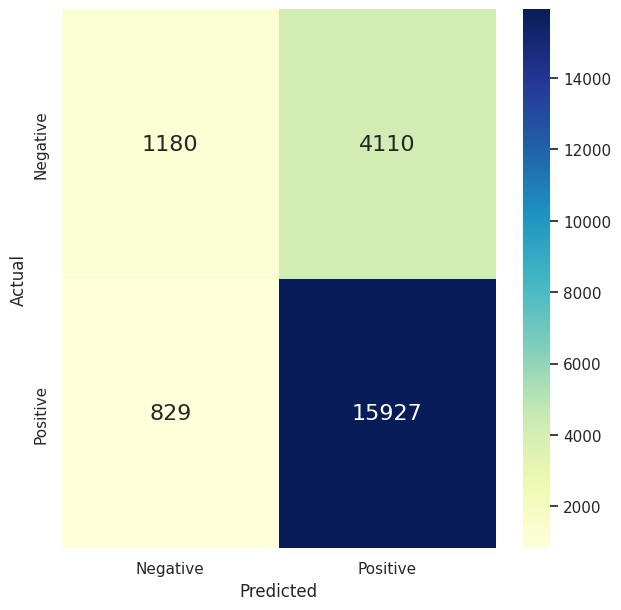

In [ ]:
data = confusion_matrix(y_test, y_test_pred)
df_cm = pd.DataFrame(
    data,
    columns=np.unique(["Negative", "Positive"]),
    index=np.unique(["Negative", "Positive"]),
)
# print(df_cm)
df_cm.index.name = "Actual"
df_cm.columns.name = "Predicted"
plt.figure(figsize=(7, 7))
sns.set(font_scale=1)  # for label size
sns.heatmap(df_cm, cmap="YlGnBu", annot=True, annot_kws={"size": 16},fmt="g")  # font size
plt.show()

## RandomForest

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
X

,price,freight_value,delivery_status,product_category_name,logisstatus,locationstatus,product_weight_g,fee_status,order_status,volume,seller_state,customer_state
0,124.99,21.88,1,office_furniture,0,Same state,8683.0,0,delivered,107136.0,SP,SP
1,112.99,24.90,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,PA
2,112.99,24.90,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,PA
3,124.99,15.62,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,RS
4,106.99,30.59,1,office_furniture,0,Different state,8683.0,0,delivered,107136.0,SP,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...
112366,145.90,15.47,1,drinks,1,Same state,2250.0,0,delivered,7168.0,BA,BA
112368,49.90,22.28,1,pet_shop,1,Different state,200.0,0,delivered,8960.0,PR,MG
112369,730.00,45.98,1,home_construction,0,Same state,15008.0,0,shipped,74307.0,SP,SP
112370,135.98,88.46,1,garden_tools,1,Different state,3211.0,0,delivered,41976.0,PR,GO


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
X

,price,freight_value,delivery_status,product_category_name,logisstatus,locationstatus,product_weight_g,fee_status,order_status,volume,seller_state,customer_state
0,124.99,21.88,1,office_furniture,0,Same state,8683.0,0,delivered,107136.0,SP,SP
1,112.99,24.90,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,PA
2,112.99,24.90,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,PA
3,124.99,15.62,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,RS
4,106.99,30.59,1,office_furniture,0,Different state,8683.0,0,delivered,107136.0,SP,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...
112366,145.90,15.47,1,drinks,1,Same state,2250.0,0,delivered,7168.0,BA,BA
112368,49.90,22.28,1,pet_shop,1,Different state,200.0,0,delivered,8960.0,PR,MG
112369,730.00,45.98,1,home_construction,0,Same state,15008.0,0,shipped,74307.0,SP,SP
112370,135.98,88.46,1,garden_tools,1,Different state,3211.0,0,delivered,41976.0,PR,GO


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
num_features = ["price", "freight_value",'product_weight_g','volume']

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train_num_scaled = scaler.fit_transform(X_train[num_features])

In [ ]:
X_train[num_features]

,price,freight_value,product_weight_g,volume
9357,59.90,13.44,1800.0,32560.0
78357,70.25,23.07,1575.0,12558.0
103749,498.00,69.22,13150.0,88200.0
36271,75.00,7.87,175.0,15000.0
104783,14.99,15.10,900.0,24300.0
...,...,...,...,...
55681,429.90,38.36,5000.0,25069.0
78017,119.00,15.58,500.0,3600.0
105402,39.90,15.10,200.0,3328.0
860,196.99,49.05,17000.0,87696.0


In [ ]:
X_train_num_scaled

array([[0.0125929 , 0.03280609, 0.0445269 , 0.10941765],
       [0.01480012, 0.05631224, 0.03896104, 0.04185245],
       [0.10602135, 0.16896114, 0.32529375, 0.29736522],
       ...,
       [0.00832774, 0.03685804, 0.00494743, 0.01067423],
       [0.04182848, 0.11972759, 0.42053185, 0.29566275],
       [0.03178614, 0.03112185, 0.04205318, 0.02515876]])

In [ ]:
X_test_num_scaled = scaler.transform(X_test[num_features])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
X

,price,freight_value,delivery_status,product_category_name,logisstatus,locationstatus,product_weight_g,fee_status,order_status,volume,seller_state,customer_state
0,124.99,21.88,1,office_furniture,0,Same state,8683.0,0,delivered,107136.0,SP,SP
1,112.99,24.90,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,PA
2,112.99,24.90,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,PA
3,124.99,15.62,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,RS
4,106.99,30.59,1,office_furniture,0,Different state,8683.0,0,delivered,107136.0,SP,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...
112366,145.90,15.47,1,drinks,1,Same state,2250.0,0,delivered,7168.0,BA,BA
112368,49.90,22.28,1,pet_shop,1,Different state,200.0,0,delivered,8960.0,PR,MG
112369,730.00,45.98,1,home_construction,0,Same state,15008.0,0,shipped,74307.0,SP,SP
112370,135.98,88.46,1,garden_tools,1,Different state,3211.0,0,delivered,41976.0,PR,GO


In [ ]:
cat_features = ['product_category_name','locationstatus','order_status','seller_state','customer_state']

In [ ]:
#encoder = OneHotEncoder(handle_unknown="ignore")
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
copy1 = X_train[cat_features]

In [ ]:
copy1 = copy1.apply(le.fit_transform, axis=0)

In [ ]:
copy1

,product_category_name,locationstatus,order_status,seller_state,customer_state
9357,42,2,1,22,25
78357,7,0,1,20,25
103749,0,0,1,8,4
36271,20,2,1,22,25
104783,5,0,1,22,8
...,...,...,...,...,...
55681,5,0,1,22,10
78017,59,0,1,22,22
105402,65,0,1,20,17
860,57,2,1,22,25


In [ ]:
copy1 = copy1.to_numpy()

In [ ]:
copy1

array([[42,  2,  1, 22, 25],
       [ 7,  0,  1, 20, 25],
       [ 0,  0,  1,  8,  4],
       ...,
       [65,  0,  1, 20, 17],
       [57,  2,  1, 22, 25],
       [ 7,  2,  1, 22, 25]])

In [ ]:
copy2 = X_test[cat_features]

In [ ]:
copy2 = copy2.apply(le.fit_transform, axis=0)

In [ ]:
copy2 = copy2.to_numpy()

In [ ]:
X

,price,freight_value,delivery_status,product_category_name,logisstatus,locationstatus,product_weight_g,fee_status,order_status,volume,seller_state,customer_state
0,124.99,21.88,1,office_furniture,0,Same state,8683.0,0,delivered,107136.0,SP,SP
1,112.99,24.90,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,PA
2,112.99,24.90,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,PA
3,124.99,15.62,1,office_furniture,1,Different state,8683.0,0,delivered,107136.0,SP,RS
4,106.99,30.59,1,office_furniture,0,Different state,8683.0,0,delivered,107136.0,SP,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...
112366,145.90,15.47,1,drinks,1,Same state,2250.0,0,delivered,7168.0,BA,BA
112368,49.90,22.28,1,pet_shop,1,Different state,200.0,0,delivered,8960.0,PR,MG
112369,730.00,45.98,1,home_construction,0,Same state,15008.0,0,shipped,74307.0,SP,SP
112370,135.98,88.46,1,garden_tools,1,Different state,3211.0,0,delivered,41976.0,PR,GO


In [ ]:
remainding_features = ["delivery_status",'logisstatus','fee_status']
X_train_remained = X_train[remainding_features].values

In [ ]:
X_train_remained

array([[1, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       ...,
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0]])

In [ ]:
X_train_num_scaled

array([[0.0125929 , 0.03280609, 0.0445269 , 0.10941765],
       [0.01480012, 0.05631224, 0.03896104, 0.04185245],
       [0.10602135, 0.16896114, 0.32529375, 0.29736522],
       ...,
       [0.00832774, 0.03685804, 0.00494743, 0.01067423],
       [0.04182848, 0.11972759, 0.42053185, 0.29566275],
       [0.03178614, 0.03112185, 0.04205318, 0.02515876]])

In [ ]:
X_train_final = np.concatenate(
    [X_train_num_scaled, copy1, X_train_remained], axis=1
)

In [ ]:
X_train_final.shape

(88183, 12)

In [ ]:
X_test_remained = X_test[remainding_features].values

In [ ]:
X_test_final = np.concatenate(
    [X_test_num_scaled, copy2, X_test_remained], axis=1
)

In [ ]:
X_test_final.shape

(22046, 12)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.8)
X_train_final_resampled,y_train_resampled = smote.fit_resample(X_train_final,y_train)
pd.Series(y_train_resampled).value_counts()

1    66870
0    53496
dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=7, random_state=0)
clf.fit(X_train_final_resampled, y_train_resampled)

RandomForestClassifier(max_depth=7, random_state=0)

In [ ]:
y_train_pred = clf.predict(X_train_final_resampled)
y_test_pred = clf.predict(X_test_final)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
pd.Series(y).value_counts(normalize=True)

1    0.758657
0    0.241343
dtype: float64

In [ ]:
print(classification_report(y_train_resampled, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.29      0.44     53496
           1       0.63      0.97      0.76     66870

    accuracy                           0.67    120366
   macro avg       0.76      0.63      0.60    120366
weighted avg       0.74      0.67      0.62    120366



In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.38      0.46      0.41      5290
           1       0.82      0.76      0.79     16756

    accuracy                           0.69     22046
   macro avg       0.60      0.61      0.60     22046
weighted avg       0.71      0.69      0.70     22046



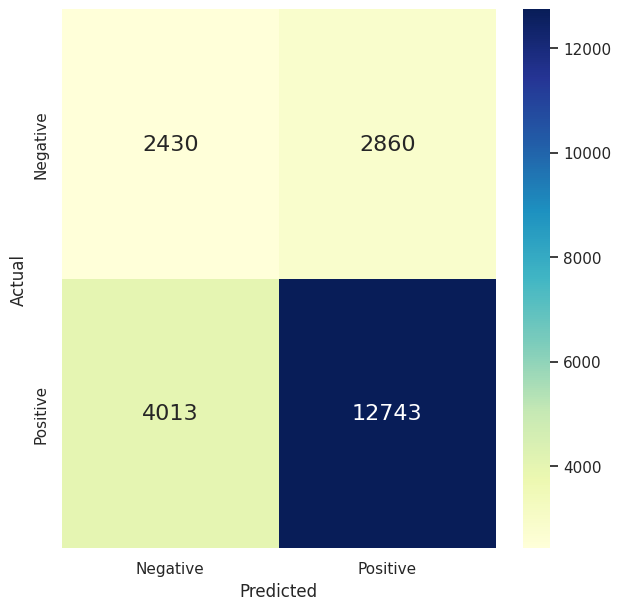

In [ ]:
data = confusion_matrix(y_test, y_test_pred)
df_cm = pd.DataFrame(
    data,
    columns=np.unique(["Negative", "Positive"]),
    index=np.unique(["Negative", "Positive"]),
)
# print(df_cm)
df_cm.index.name = "Actual"
df_cm.columns.name = "Predicted"
plt.figure(figsize=(7, 7))
sns.set(font_scale=1)  # for label size
sns.heatmap(df_cm, cmap="YlGnBu", annot=True, annot_kws={"size": 16},fmt="g")  # font size
plt.show()

# Tableau

In [ ]:
merged1.to_csv('merged1.csv',index=False)
merged2.to_csv('merged2.csv',index=False)
top5.to_csv('top5.csv',index=False)


In [ ]:
top.to_csv('top.csv',index=False)

In [ ]:
freeship.to_csv('freeship.csv',index=False)

In [ ]:
delivery.to_csv('delivery.csv',index=False)

In [ ]:
locafee.reset_index().to_csv('locafee.csv',index=False)

In [ ]:
free.reset_index().to_csv('free.csv',index=False)